In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.visualization import astropy_mpl_style
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from scipy import optimize
import pandas as pd
import math
import statistics
from scipy.ndimage import gaussian_filter1d 
import csv
import sys
from lmfit import Model
from scipy.signal import medfilt 
import sympy as sym

In [2]:
path='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/Spectra for plotting/'


In [3]:
emission_lines=[1215.67,1393.,1240.81,1549.48,1640.42,1908.734,2800.315188621943,3727.0917225096655,
                3729.87544376128,3869.8567959162406,3890.151079071683,3971.1231883143773,4102.891635399645,
                4341.684323950415,4364.435312373618,4686.991466008997,4862.683021040764,4960.294931825264,
                5008.239669615672,5413.024467154929,5578.887753538833,5756.186156709958,5877.308574906249,
                6302.046448389282,6313.80560491733,6365.535493114148,6549.859008201306,6564.613973710928,
                6585.26852522626,6718.294291949573,6732.678160576219,7137.75719911729]
    

In [32]:
def gauss4(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2,ga3,gb3,gc3):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)+ga2*np.exp(-((x-gb2)/gc2)**2 )
           +ga3*np.exp(-((x-gb3)/gc3)**2 ))
def gauss3(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)
            +ga2*np.exp(-((x-gb2)/gc2)**2 ))
def gauss2(x,c,a,ga,gb,gc,ga1,gb1,gc1):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2))
def gauss1(x,c,a,ga,gb,gc):
     return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 ))

def line(x,c,a):
    return (c+a*x)


In [ ]:
image=source=np.load(path+'J0152-2448.npy',allow_pickle=True)  
x=wavelength=source[2]
z=1.32


x2=x/(z+1)
flux=source[0]
y=bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]

n=len(x)
mean=sum(x*y)/n
gc=sum(y*(x-mean)**2)/n
gc1=gc
med=statistics.median(bright_flux)
plt.figure()
#plt.plot(wavelength/(z+1),flux1,label='redshifted data')
p0=[med,-0.05,10,1549,1,10,2800,1]

plt.plot(x2,flux1)

popt,pcov= curve_fit(gauss,x,y,p0=p0)
a=round(2*np.sqrt(2*np.log(2))*popt[4])
b=round(2*np.sqrt(2*np.log(2))*popt[7])
    
print('FWHM(CIV)=',a)
print('FWHM(MGII)=',b)

plt.ylim(-10000,10000)
#perr = np.sqrt(np.diag(pcov))
plt.plot(x2, gauss(x,*p0),'r', label='guassianfit')
plt.legend()

In [ ]:
spectra='J0329-0208.npy'
z=1.352
source=np.load(path+spectra,allow_pickle=True)  
print(spectra)

wavelength=source[2]
flux=source[0]
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------

x=wavelength/(z+1)
y1=flux1
x= np.nan_to_num(x)
y1= np.nan_to_num(y1)
plt.plot(x,y1)
plt.ylim(-1000,2000)

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(10,10))

n=len(x)
mean=sum(x*y1)/n
gc=sum(y1*(x-mean)**2)/n
gc1=gc2=gc3=gc

#y1=gaussian_filter1d(y1,0.1)## This value should be adjusted
med=statistics.median(y1)
  
p0=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
pos=np.where((x > 1600) & (x < 3500))   
popt1,pcov1= curve_fit(gauss,x[pos],y1[pos],p0=p0)

FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt1[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt1[10])

CIV_low=(popt1[0]+popt1[1]*popt1[3])
CIV_high=(gauss(popt1[3],*popt1))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt1[0]+popt1[1]*popt1[6])
CIII_high=(gauss(popt1[6],*popt1))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt1[0]+popt1[1]*popt1[9])
MGII_high=(gauss(popt1[9],*popt1))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value)
with open('CSVFILE_bright.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value)  
    f_object.close()
    
perr1 = np.sqrt(np.diag(pcov1))
ax[0].plot(x,y1,label='redshifted data')
ax[0].plot(x, gauss(x, *popt1),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[0].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux') 
ax[0].set_ylim(-5000,5000)
ax[0].legend()
##FAINT FLUX---------------------------------------------------------------------
x=wavelength/(z+1)
y2=flux2
x= np.nan_to_num(x)
y2= np.nan_to_num(y2)

n=len(x)
mean=sum(x*y2)/n
gc=sum(y2*(x-mean)**2)/n
gc1=gc2=gc3=gc
#y2=gaussian_filter1d(y2,0.1)## This value should be adjusted
med=statistics.median(y2)
    
p1=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
popt2,pcov2= curve_fit(gauss,x[pos],y2[pos],p0=p1)
FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt2[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt2[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt2[10])

CIV_low=(popt2[0]+popt2[1]*popt2[3])
CIV_high=(gauss(popt2[3],*popt2))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt2[0]+popt2[1]*popt2[6])
CIII_high=(gauss(popt2[6],*popt2))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt2[0]+popt2[1]*popt2[9])
MGII_high=(gauss(popt2[9],*popt2))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value1=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value1)
with open('CSVFILE_faint.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value1)  
    f_object.close()
    
perr2 = np.sqrt(np.diag(pcov2))
ax[1].plot(x,y2,label='redshifted data')
ax[1].plot(x, gauss(x, *popt2),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[1].set_xlabel('Wavelength')
ax[1].set_ylabel('Flux')     
ax[1].set_ylim(-1000,1000)
ax[1].legend()
plt.savefig(path+name[i]+'.png')
plt.show()
plt.clf()

In [ ]:
DF=pd.read_csv('NTT.csv',header=0)
a=path+DF.Spectra[0]



In [ ]:
DF=pd.read_csv('ciii_sources.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(3,1,figsize=(10,15))  
    fig.patch.set_facecolor('white')
   #BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3700) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    y3=y1/y2
    
    y3=np.nan_to_num(y3,nan=np.nanmedian(y3))
    y3=medfilt(y3,13)
    med3=statistics.median(y3)
    ax[0].set_title('Wavelength vs Flux')
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
            ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[13]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        
        lyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        LyA_high1=(gauss4(popt1[3],*popt1)) 
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss4(popt1[6],*popt1))

        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss4(popt1[9],*popt1)) 
        
        
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2)
        MgII_high1=(gauss4(popt1[12],*popt1)) 
        
              
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2+perr1[11]**2)
        
        
        MgII_dif1=MgII_high1-MgII_low1
               
          
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
         
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        
        perr2 = np.sqrt(np.diag(pcov2))

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2=round(2*np.log(2))*perr2[10]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[13]

        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        lyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss4(popt2[3],*popt2)) 
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss4(popt2[6],*popt2))
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss4(popt2[9],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2)
        MgII_high2=(gauss4(popt2[12],*popt2))
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2+perr2[11]**2)
        
        MgII_dif2=MgII_high2-MgII_low2
              
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss4,x,y3,p0=p03,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[10]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[13])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[13]


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss4(popt3[3],*popt3))
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss4(popt3[6],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss4(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        
        CIII_dif3=CIII_high3-CIII_low3

    
        MgII_low3=(popt3[0]+popt3[1]*popt3[12])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss4(popt3[12],*popt3))    
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
            
        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[12],perr2[12],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[12],perr2[12],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[12],perr3[12]]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],popt1[8],perr1[8],
               popt1[9],perr1[9],popt1[10],perr1[10],popt1[11],perr1[11],popt1[12],perr1[12],
               popt1[13],perr1[13],popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],popt2[11],perr2[11],popt2[12],perr2[12],
               popt2[13],perr2[13],popt3[0],perr3[0],popt3[1],perr3[1],popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],
               popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],popt3[11],perr3[11],
               popt3[12],perr3[12],popt3[13],perr3[13]]
        


        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss4(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
               
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[10]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[3],*popt1))
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        
        CIV_dif1=CIV_high1-CIV_low1

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[6],*popt1))  
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1

    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        MgII_dif1=MgII_high1-MgII_low1
        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                                 bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[10]


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        MgII_high2=(gauss3(popt2[9],*popt2)) 
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        MgII_dif2=MgII_high2-MgII_low2

     
     
        p03=[med3,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[3],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[6],*popt3))    
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
    
        MgII_low3=(popt3[0]+popt3[1]*popt3[9])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)                                 
        MgII_high3=(gauss3(popt3[9],*popt3))   
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
         
     
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[9],perr2[9],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[9],perr2[9],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[9],perr3[9]]
        print(value)
        
        
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],
               popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],popt2[9],perr2[9],popt2[10],perr2[10],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],popt3[3],perr3[3],
               popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],
               popt3[9],perr3[9],popt3[10],perr3[10]]
        
        

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1



        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[6],*popt1)) 
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        CIII_dif1=CIII_high1-CIII_low1



        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[10]


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss3(popt2[3],*popt2))  
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[6],*popt2))   
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        CIII_dif2=CIII_high2-CIII_low2
        
        
        
        
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

        perr3 = np.sqrt(np.diag(pcov3))
            
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII_err=round(2*np.log(2))*perr3[10]
        


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss3(popt3[3],*popt3))    
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3


        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[6],*popt3))  
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
        

        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],0,0,0,0,0,0,
               popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],
               0,0,0,0,0,0]
        
    
        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        


        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
    if ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[4]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[7]


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIII_dif1=CIII_high1-CIII_low1


        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        MgII_high1=(gauss2(popt1[6],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        MgII_dif1=MgII_high1-MgII_low1
        

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr2 = np.sqrt(np.diag(pcov2))
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[4]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[7]

        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[3],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)

        MgII_dif2=MgII_high2-MgII_low2
                
        
        p03=[med3,0,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[7]


        CIII_low3=(popt3[0]+popt3[1]*popt3[3])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[3],*popt3))
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3

        MgII_low3=(popt3[0]+popt3[1]*popt3[6])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss2(popt3[6],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
       
  
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[3],perr1[3],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[3],perr2[3],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[3],perr3[3],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[6],perr2[6],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[6],perr2[6],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[6],perr3[6]]
        print(value)
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],
               popt1[6],perr1[6],popt1[7],perr1[7],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[7],perr3[7]]     

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
                       
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss2(popt1[3],*popt1))  
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIV_dif1=CIV_high1-CIV_low1


        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1  

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2))
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]

        
        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss2(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2


        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2
              
        
        p03=[med3,0,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[7]


        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss2(popt3[3],*popt3))    
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3


        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[6],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
               

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[0],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],
               popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               0,0,0,0,0,0,popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,popt2[2],perr2[2],
               popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],
               popt3[7],perr3[7],0,0,0,0,0,0]
                

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[4]

        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        MgII_high1=(gauss1(popt1[3],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        MgII_dif1=MgII_high1-MgII_low1

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr2 = np.sqrt(np.diag(pcov2))    
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII2_err=perr2[4]

        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        MgII_high2=(gauss1(popt2[3],*popt2))   
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        MgII_dif2=MgII_high2-MgII_low2
               
        p03=[med3,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss1,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))   
          
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
       
        MgII_low3=(popt3[0]+popt3[1]*popt3[3])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss1(popt3[3],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3          

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[3],perr2[3],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[3],perr2[3],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[3],perr3[3]]
        print(value)
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],
               popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4]]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
       
        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss1(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
            
    with open('CIIII.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value)  
        f_object.close()
    with open('errorfileCIIIII.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(error)  
        f_object.close()
    path1='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/plots/three spectra/'
    #plt.savefig(path1+name[i]+'.png')
    plt.show()
    plt.clf()

In [ ]:
def sd_calc(data):
    n = len(data)

    if n <= 1:
        return 0.0

    mean, sd = avg_calc(data), 0.0

    # calculate stan. dev.
    for el in data:
        sd += (float(el) - mean)**2
    sd = math.sqrt(sd / float(n-1))
    return sd
def avg_calc(ls):
    n, mean = len(ls), 0.0

    if n <= 1:
        return ls[0]

    # calculate average
    for el in ls:
        mean = mean + float(el)
    mean = mean / float(n)

    return mean


197
J0045-3937.npy
1.85


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


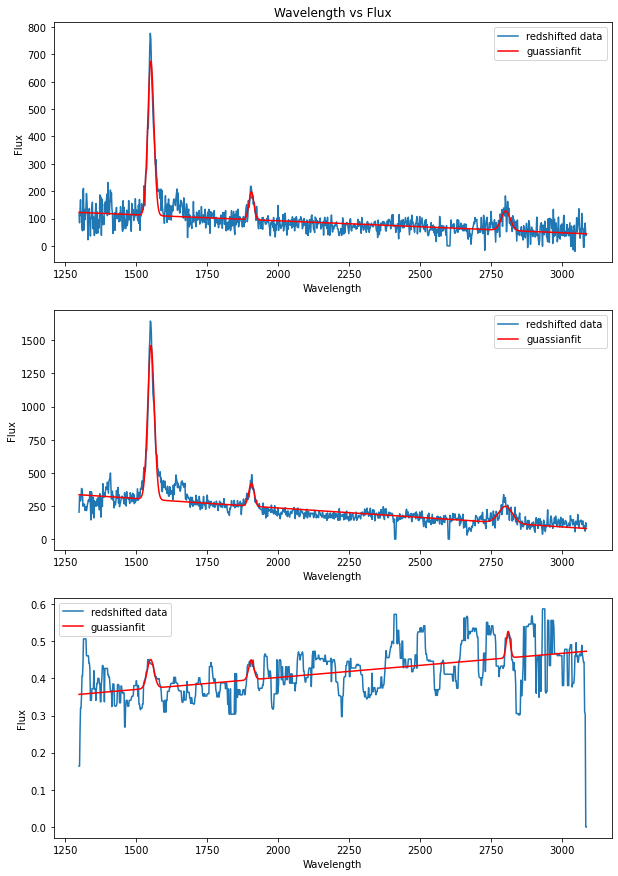

J0247-0800.npy
3.28


<Figure size 432x288 with 0 Axes>

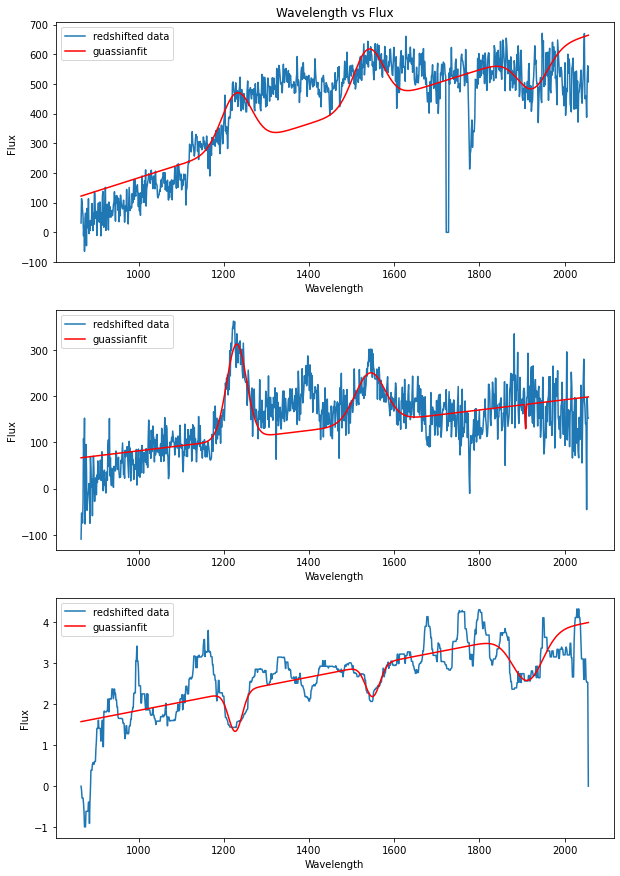

J0628-7448.npy
2.692


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

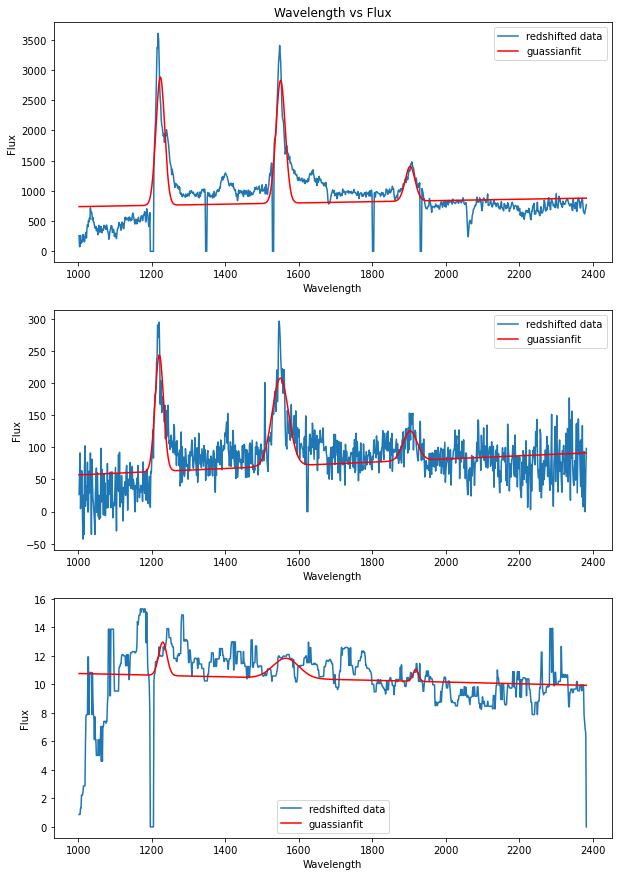

J0936-1211.npy
2.0


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

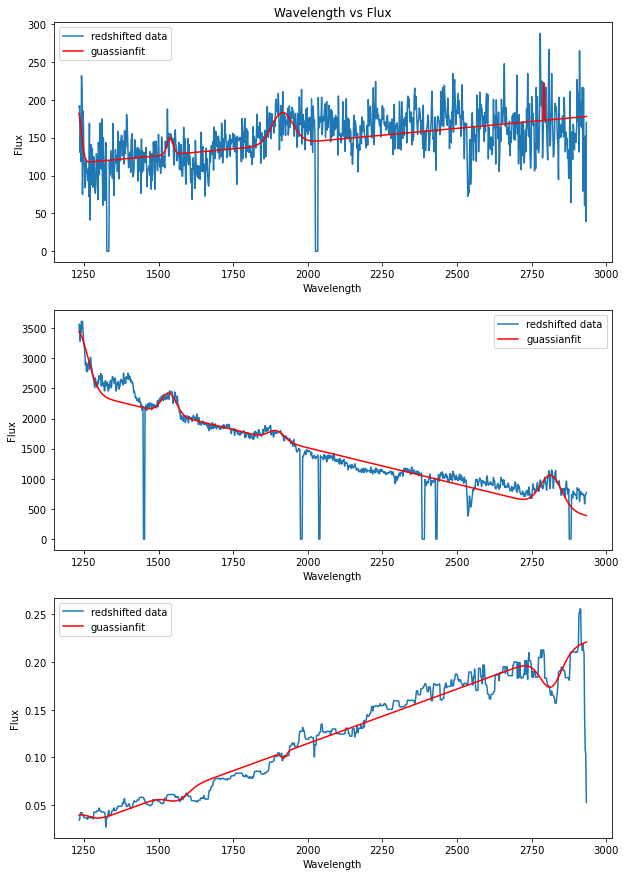

J1247-3253.npy
1.66


<Figure size 432x288 with 0 Axes>

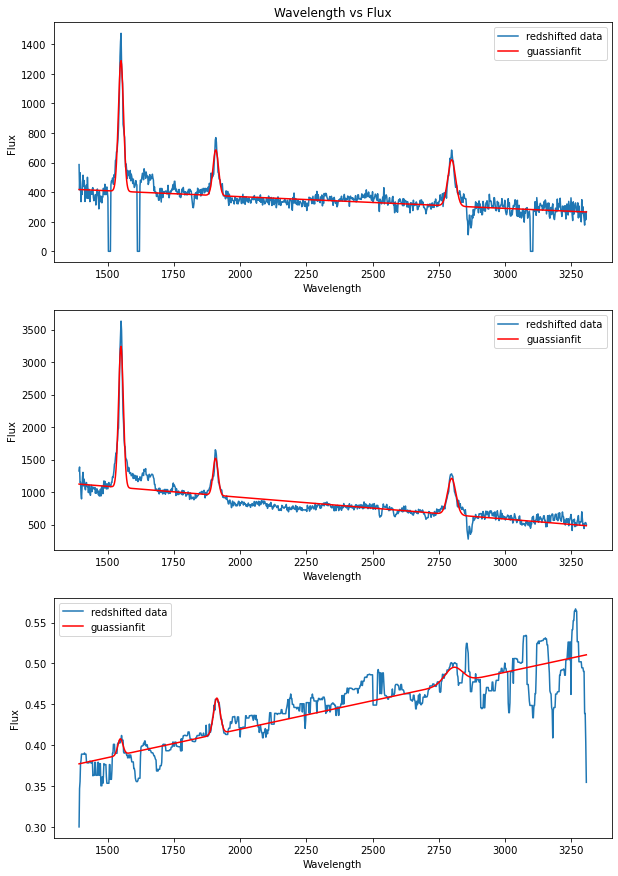

J0125-1012.npy
1.22


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

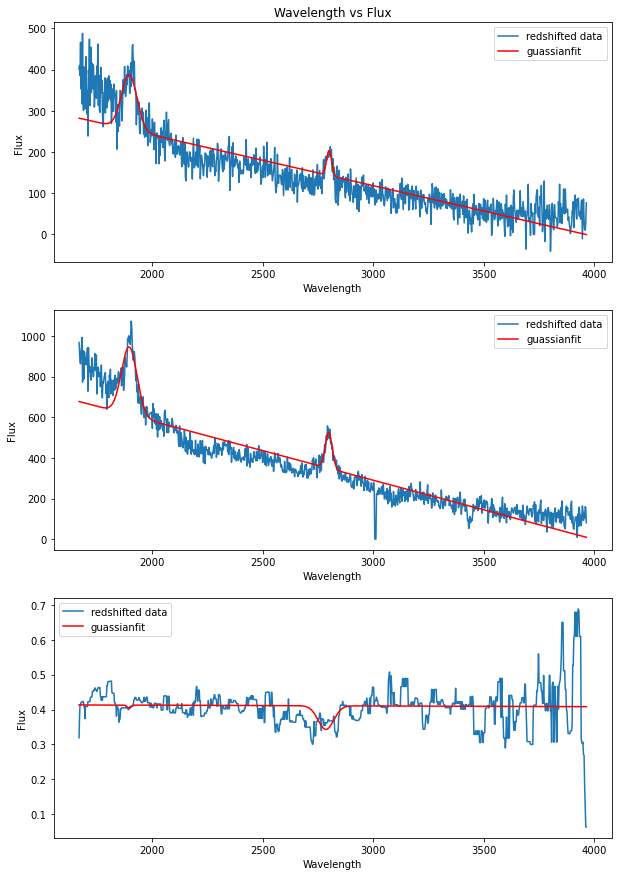

J0332-6608.npy
1.97


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

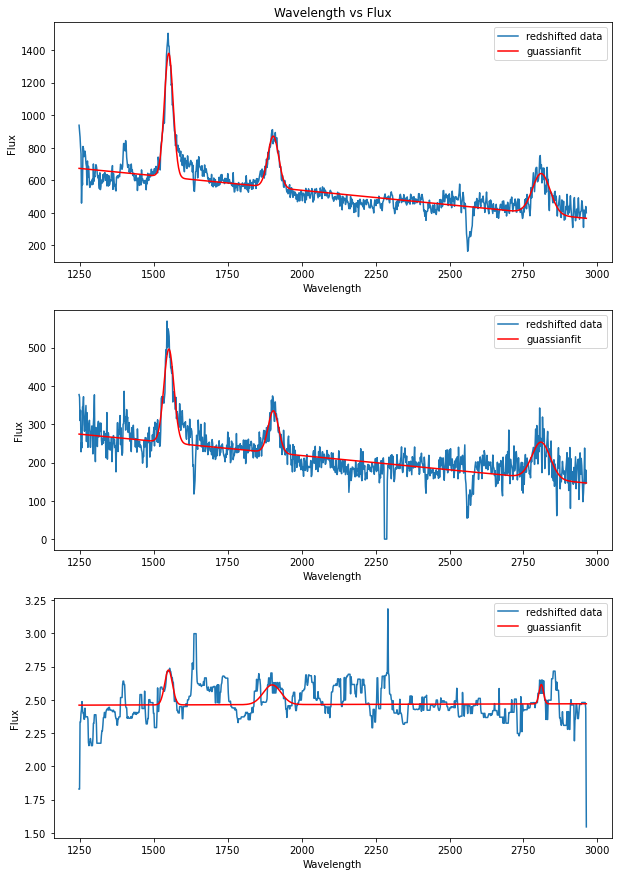

J0527-2431.npy
1.437


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

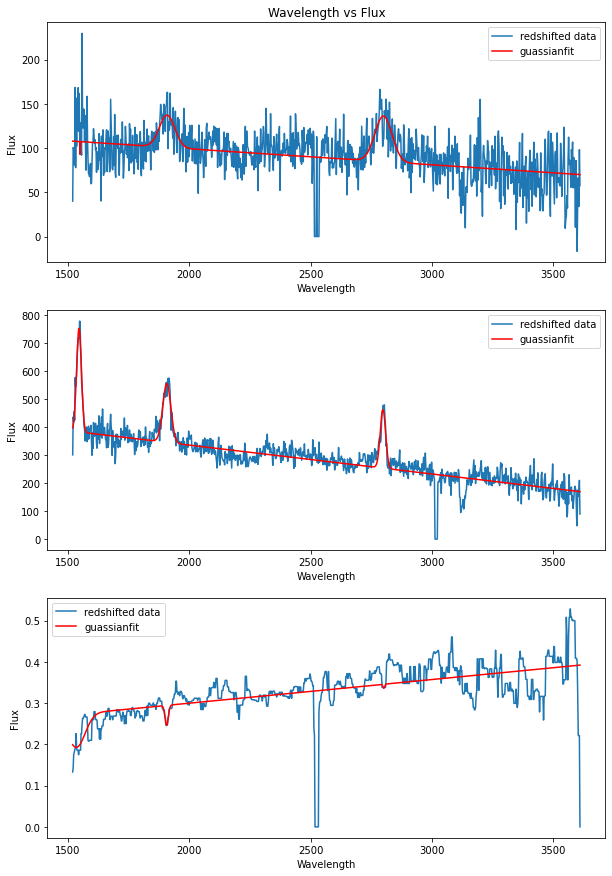

J0833-0721.npy
0.828


<Figure size 432x288 with 0 Axes>

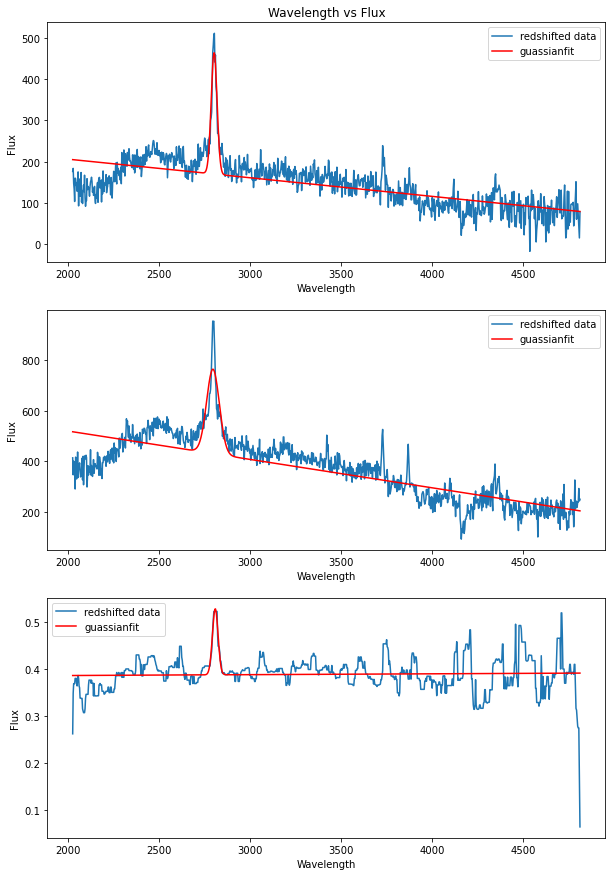

J0916-2848.npy
1.925


<Figure size 432x288 with 0 Axes>

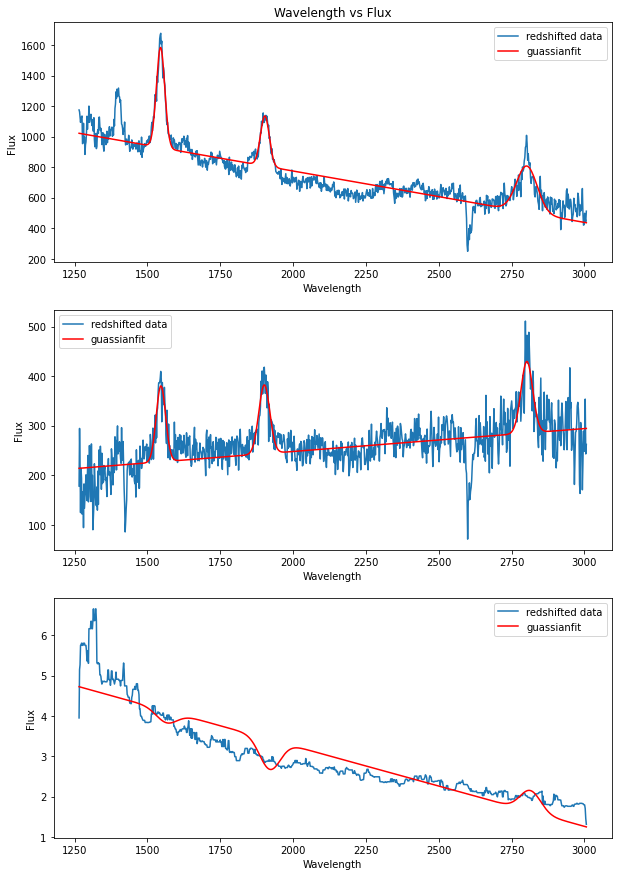

J0941-2443.npy
0.92


<Figure size 432x288 with 0 Axes>

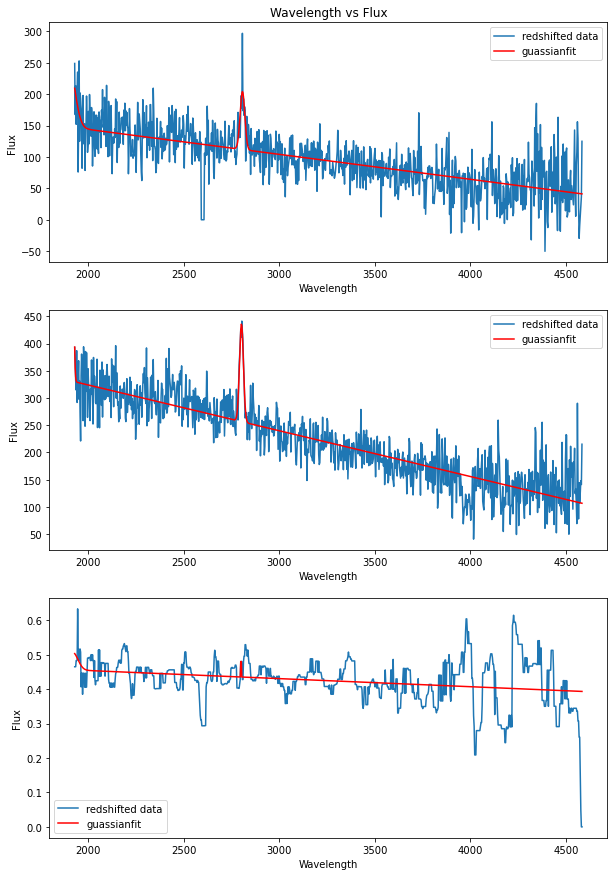

J1008-2911.npy
2.49


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

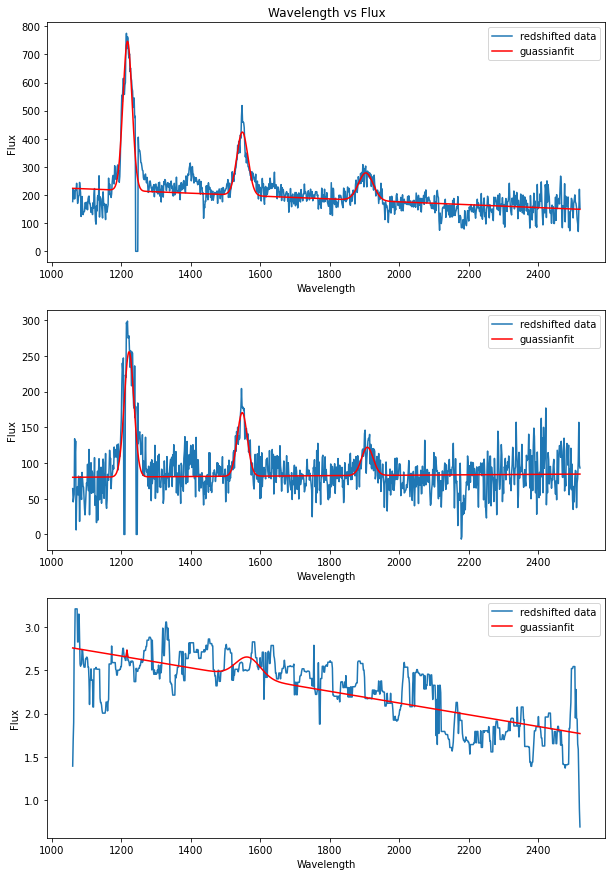

J1019-1322.npy
2.325


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

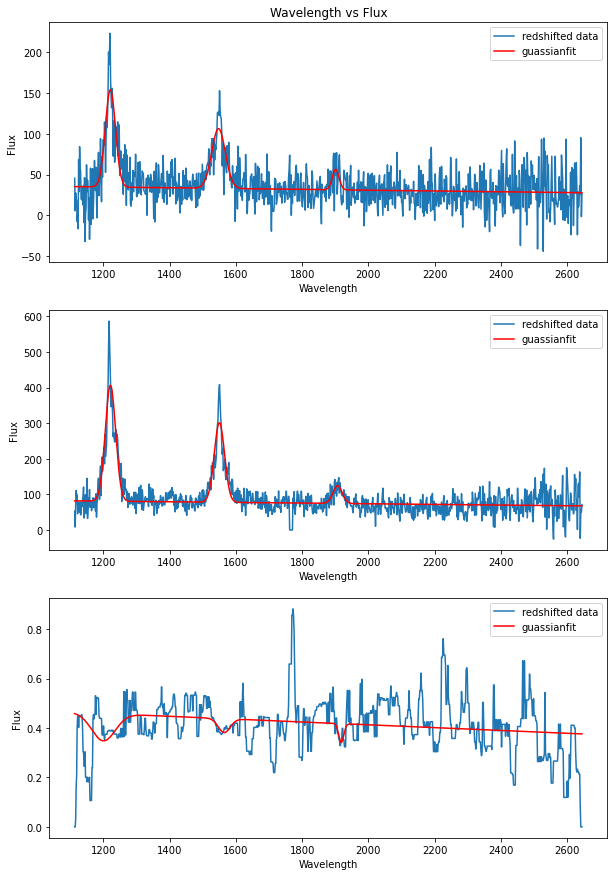

J1033-8249.npy
1.69


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

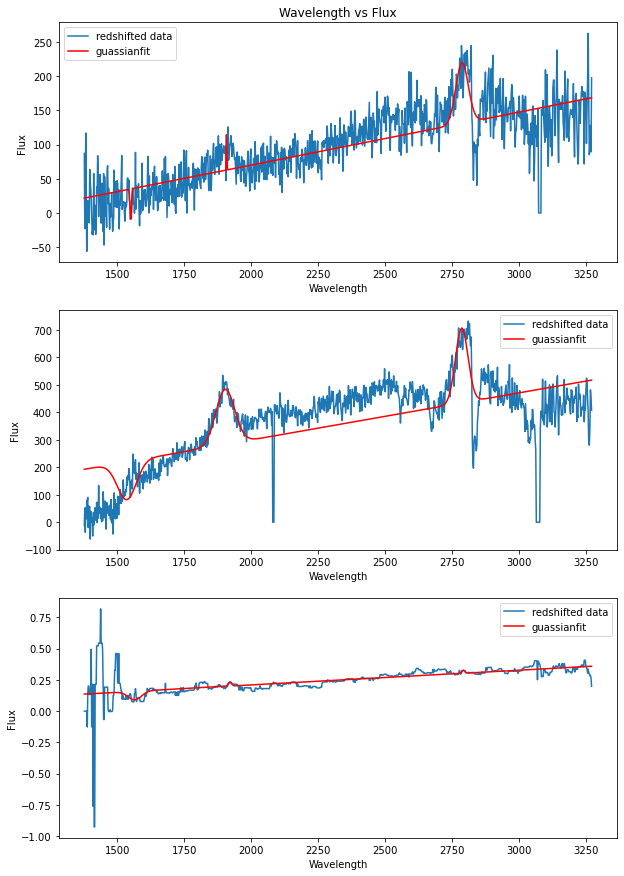

J1103-1005.npy
1.292


<Figure size 432x288 with 0 Axes>

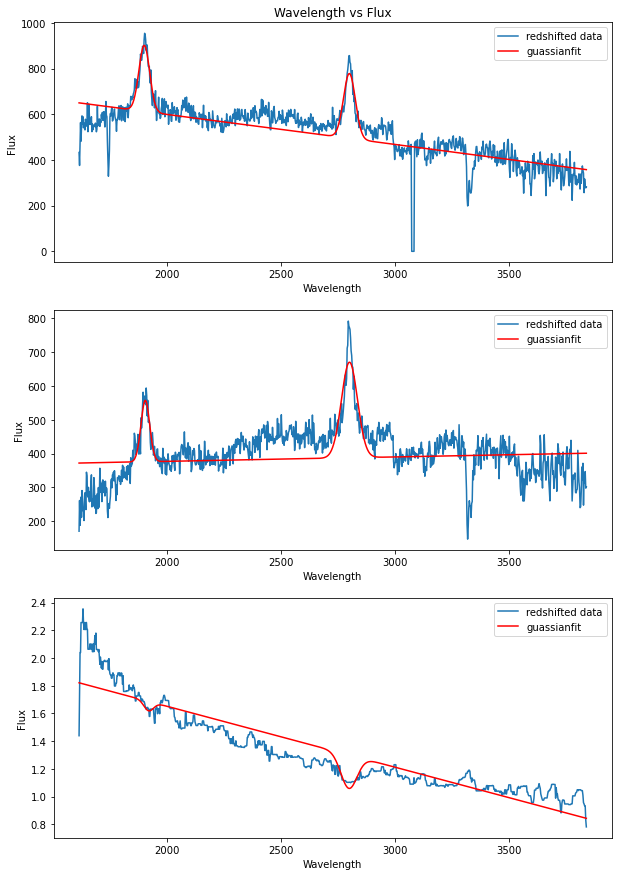

J1449-2025.npy
0.594


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

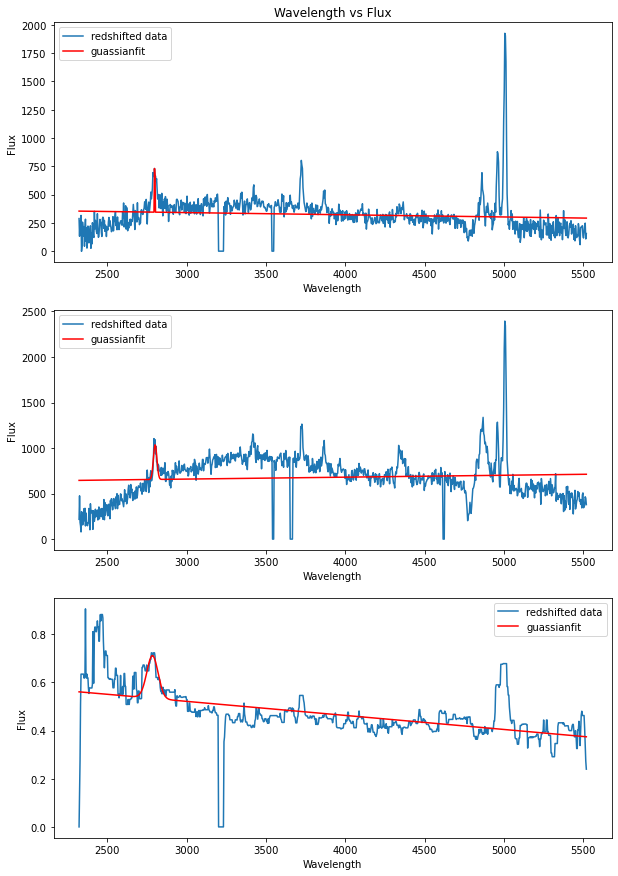

J0030-3358.npy
1.58


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

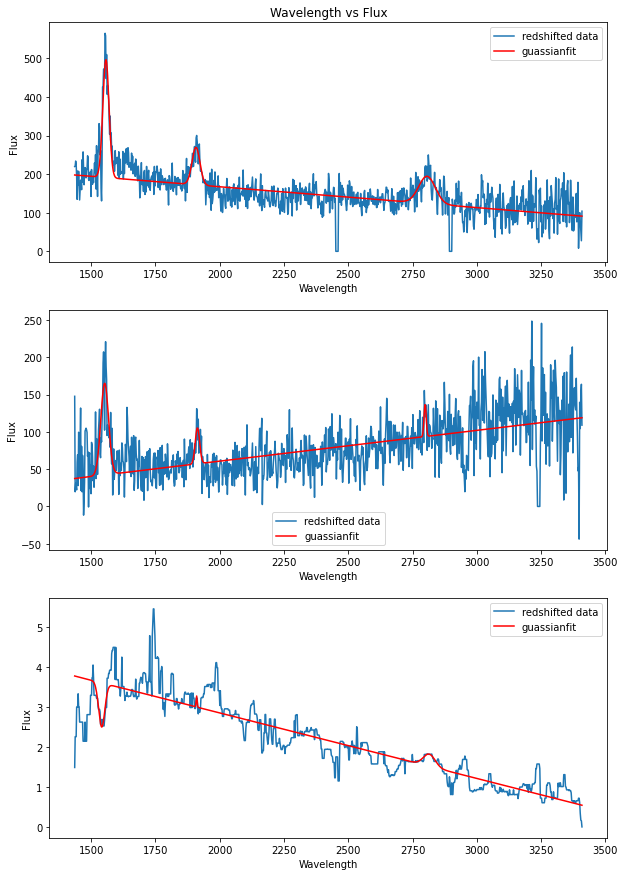

J0156-2751.npy
2.97


<Figure size 432x288 with 0 Axes>

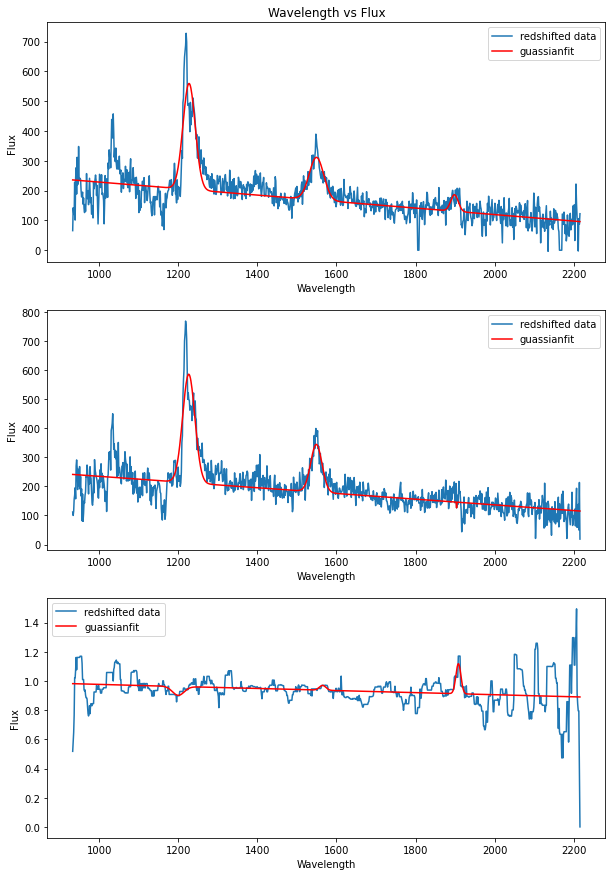

J0209-3841.npy
2.87


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

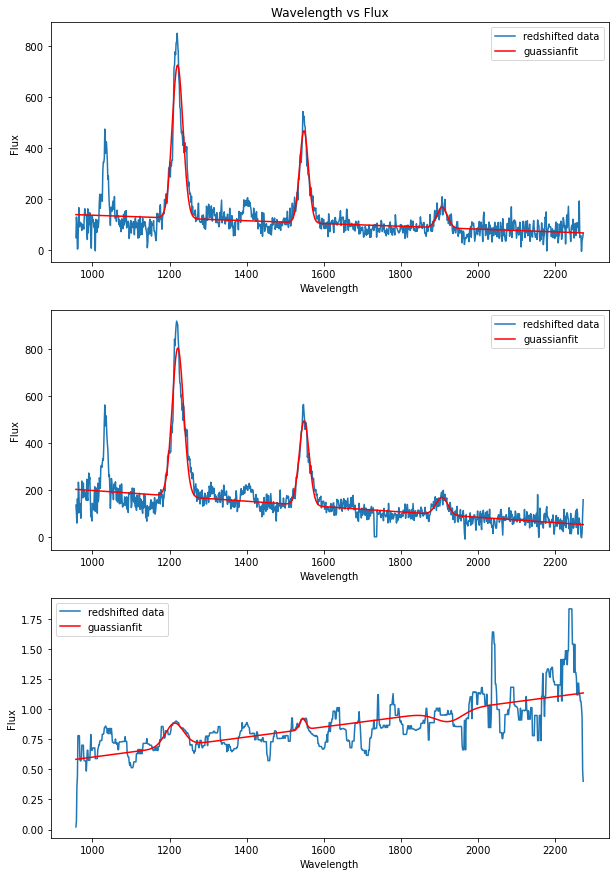

J0247-2646.npy
1.47


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

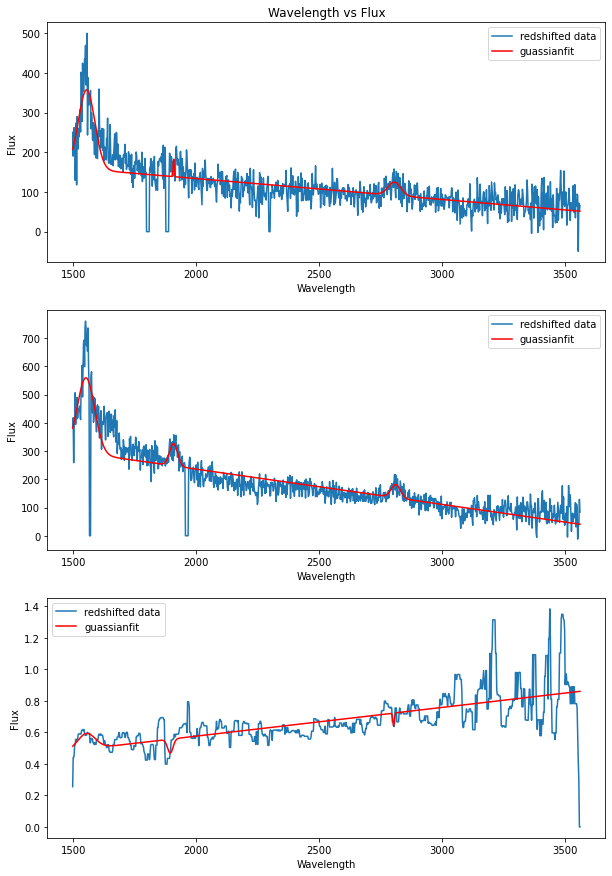

J0325-2232.npy
1.35


<Figure size 432x288 with 0 Axes>

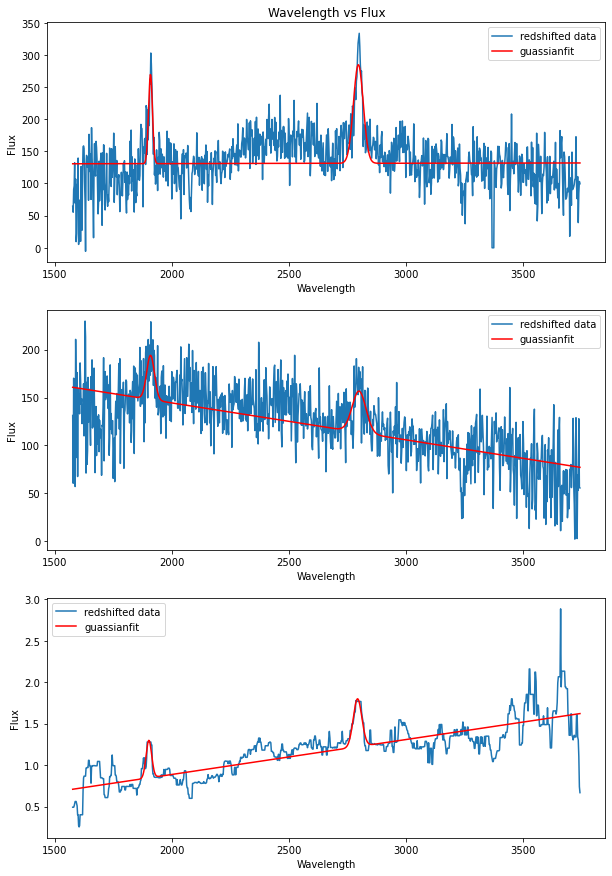

J0339-6121.npy
2.89


<Figure size 432x288 with 0 Axes>

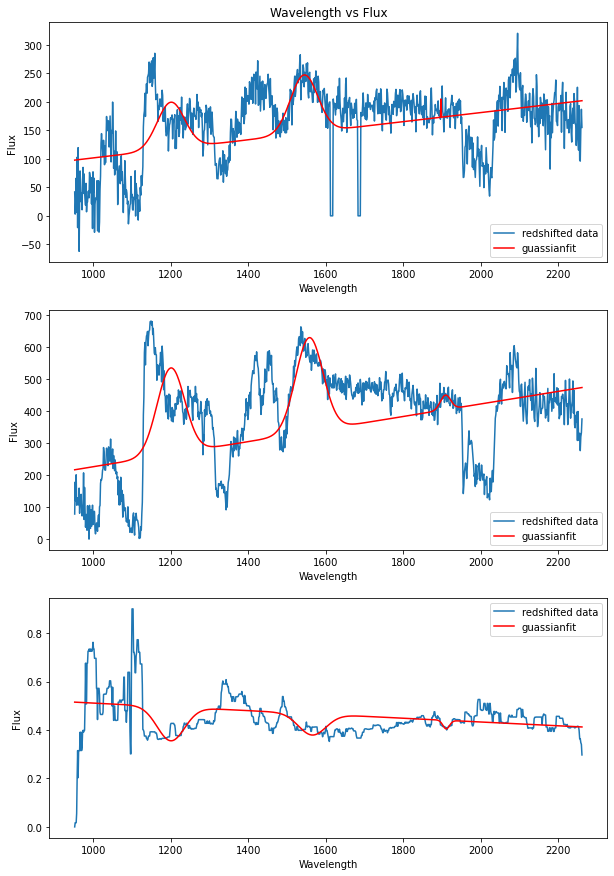

J0346-6414.npy
2.96


<Figure size 432x288 with 0 Axes>

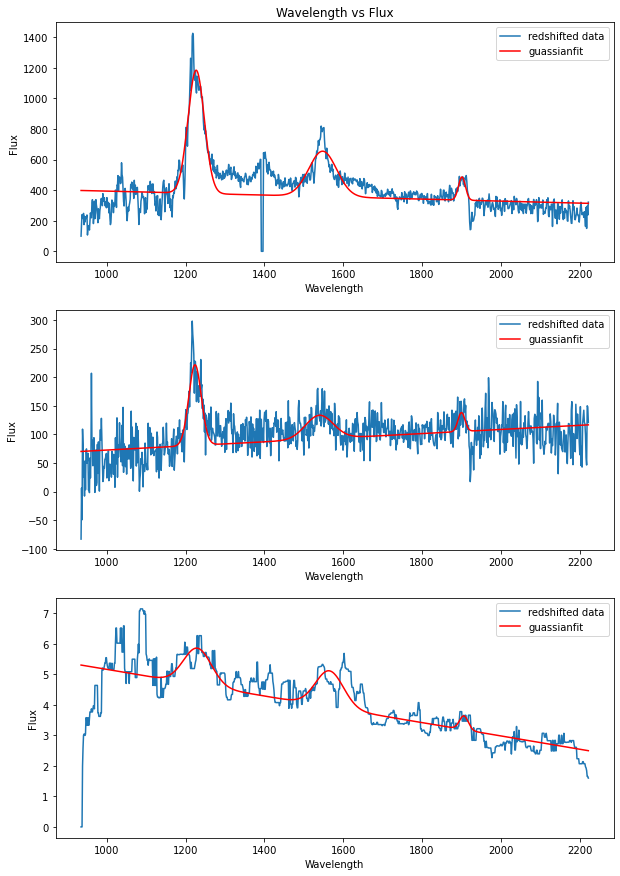

J0350-4611.npy
1.505


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

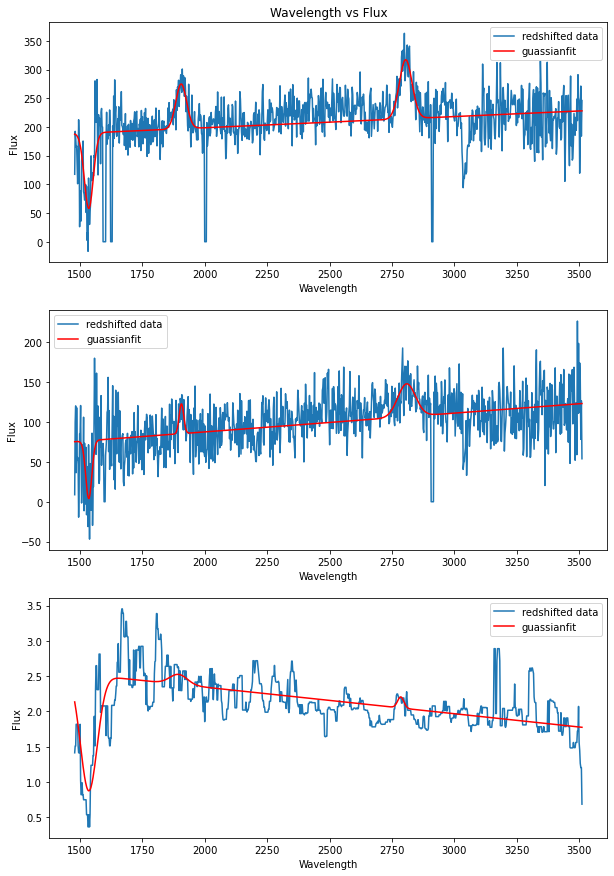

J0355-5624.npy
1.86


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

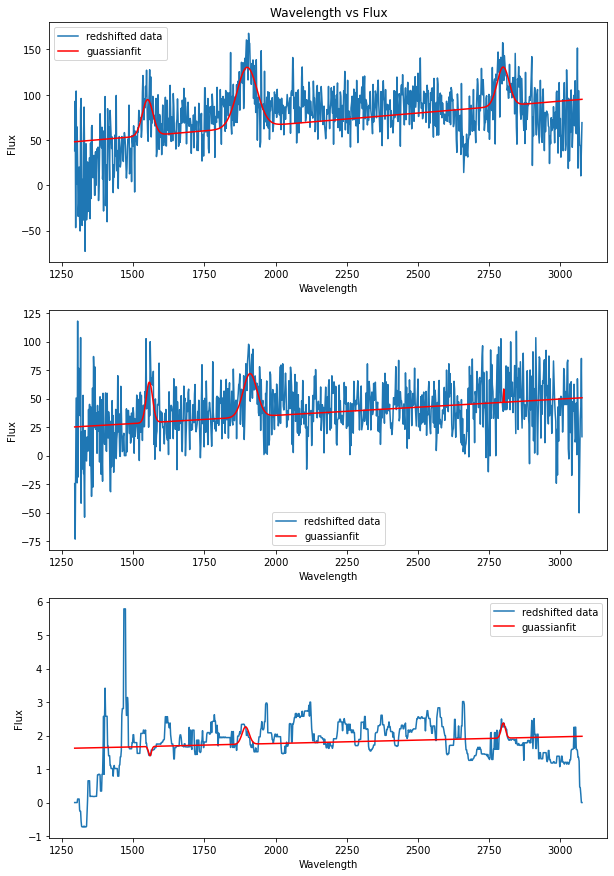

J0457-7820.npy
3.145


<Figure size 432x288 with 0 Axes>

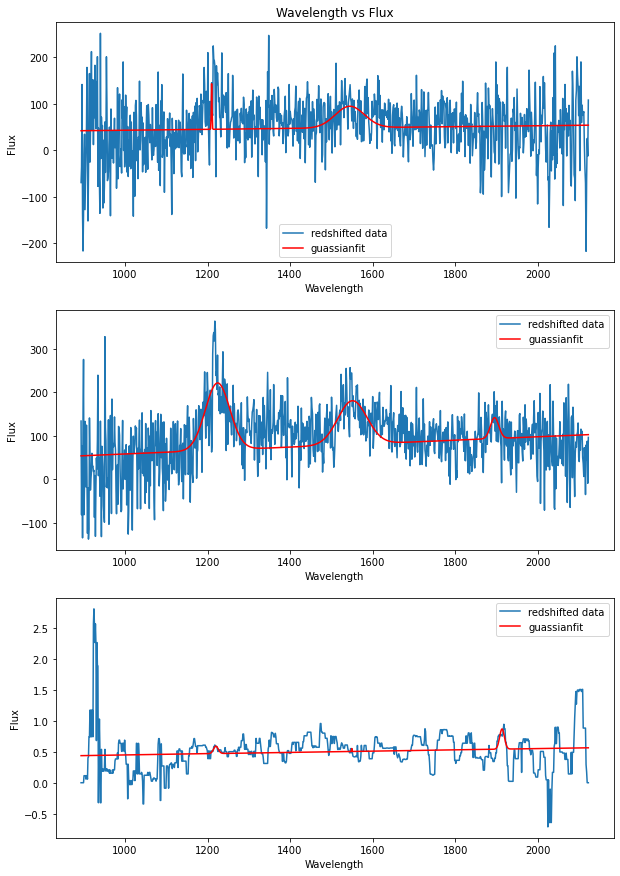

J0526-3933.npy
2.41


<Figure size 432x288 with 0 Axes>

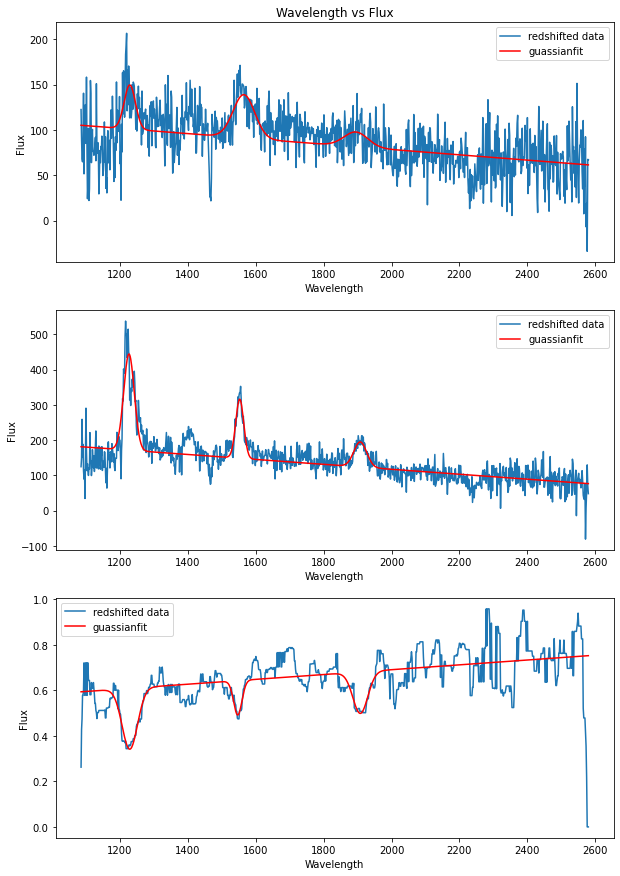

J1945-2857.npy
2.56


<Figure size 432x288 with 0 Axes>

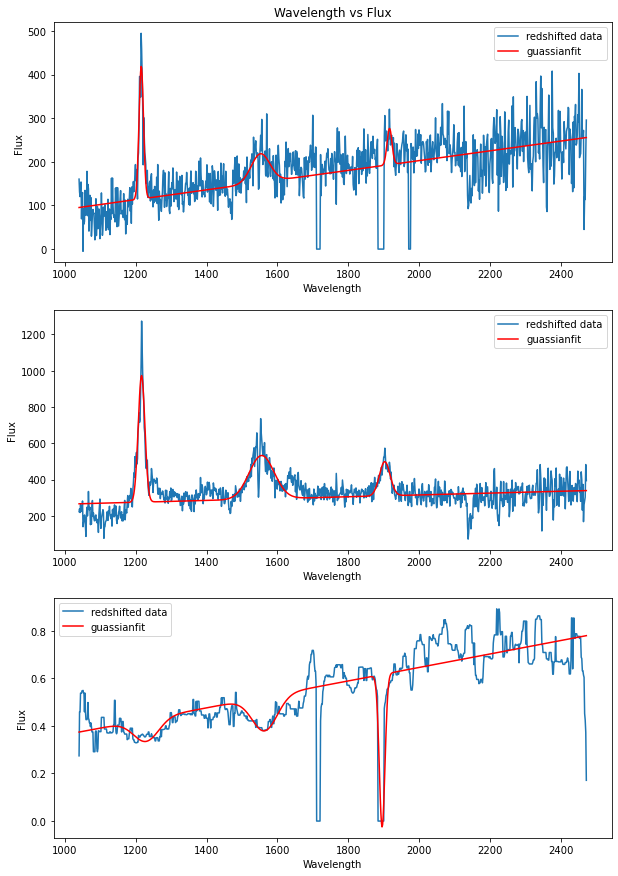

J2106-4944.npy
1.296


<Figure size 432x288 with 0 Axes>

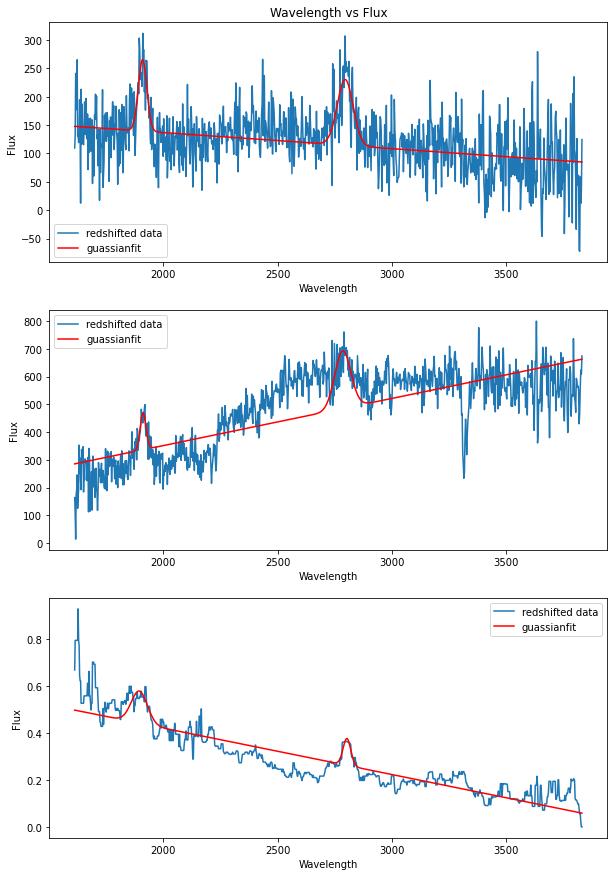

J2110-3755.npy
1.5


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

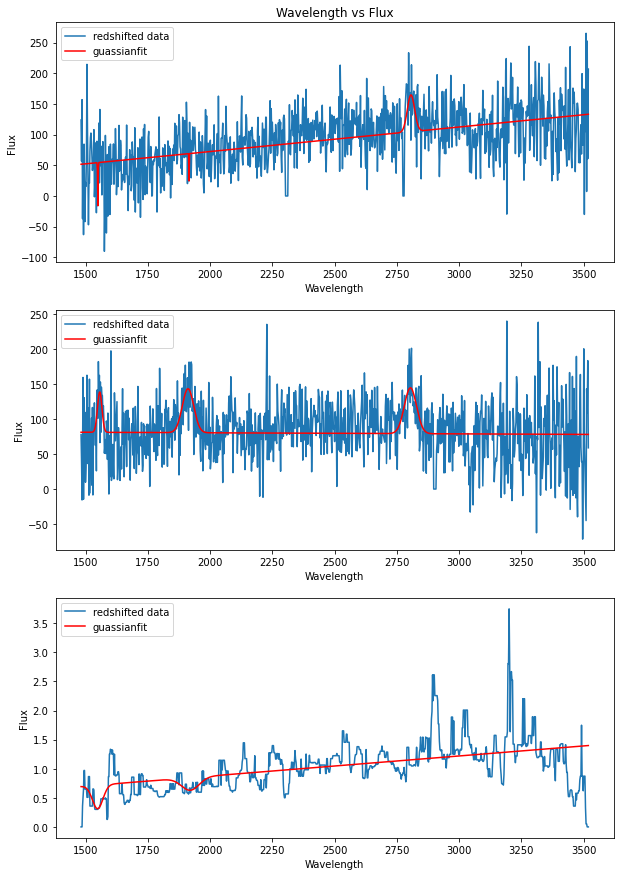

J0146-6510.npy
1.255


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

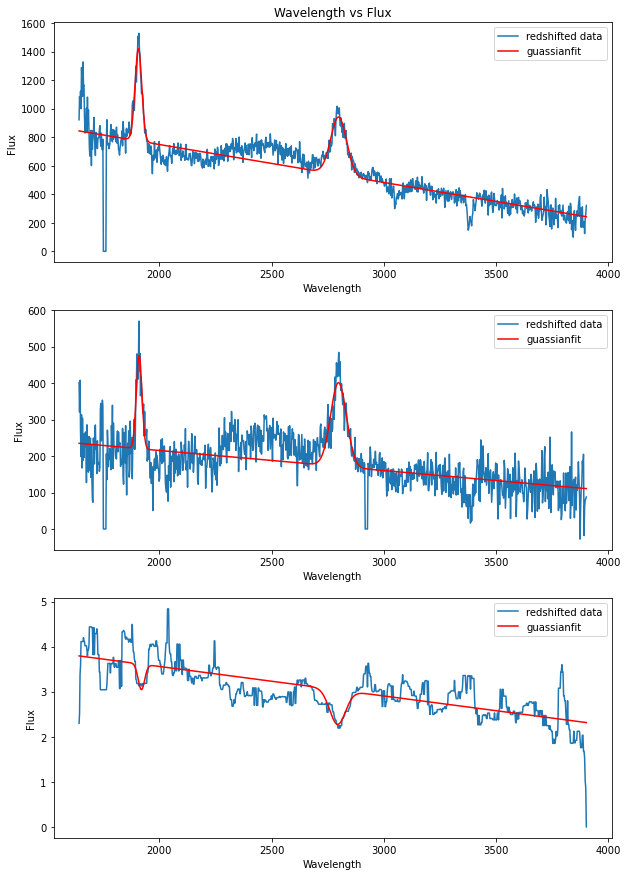

J0310-5545.npy
2.31


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

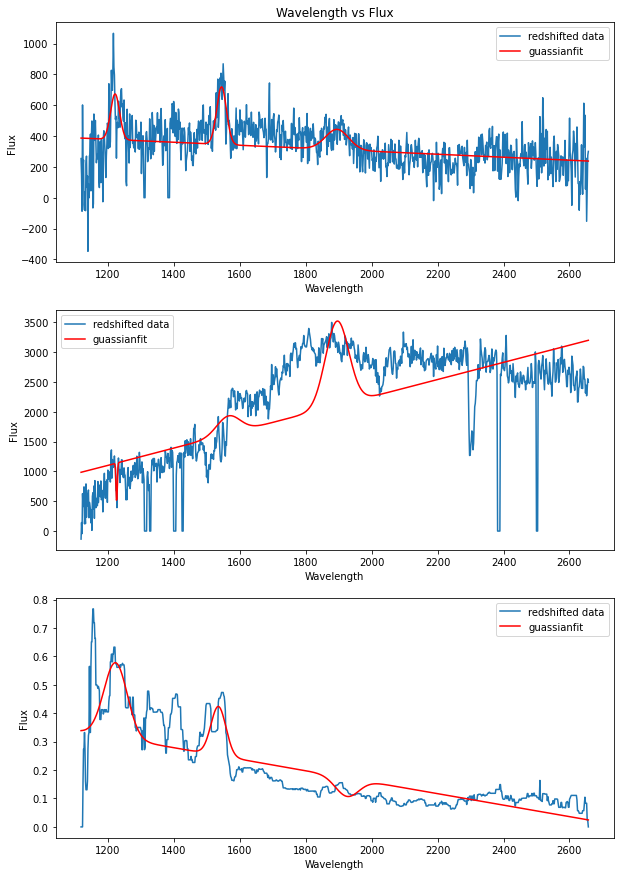

J0329-0208.npy
1.352


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

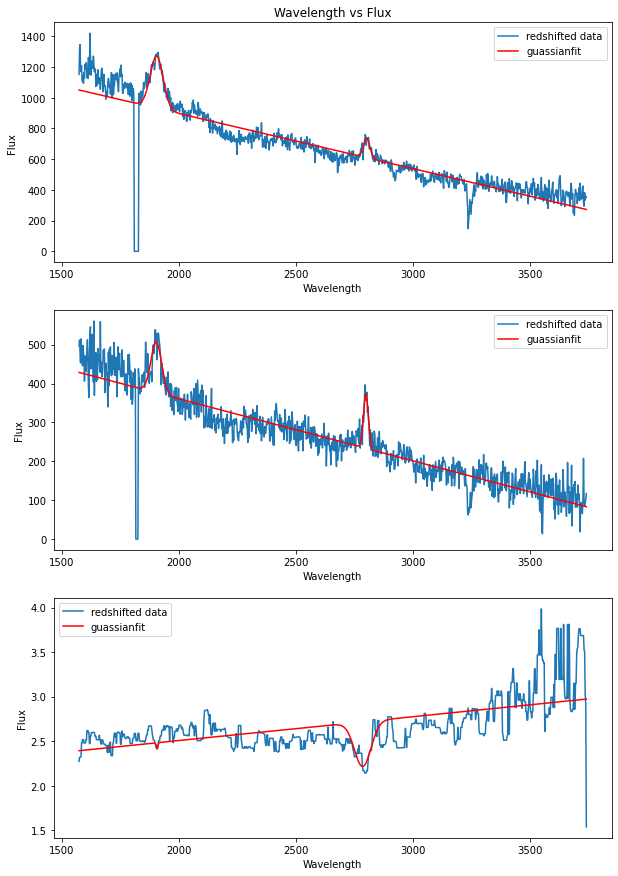

J0127-1441.npy
1.754


<Figure size 432x288 with 0 Axes>

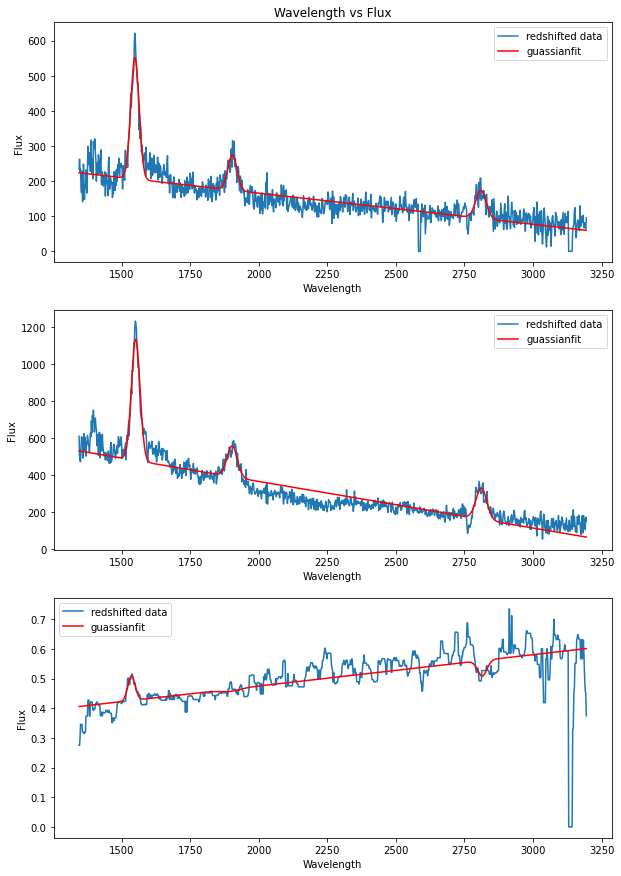

J1037+0018.npy
2.462


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

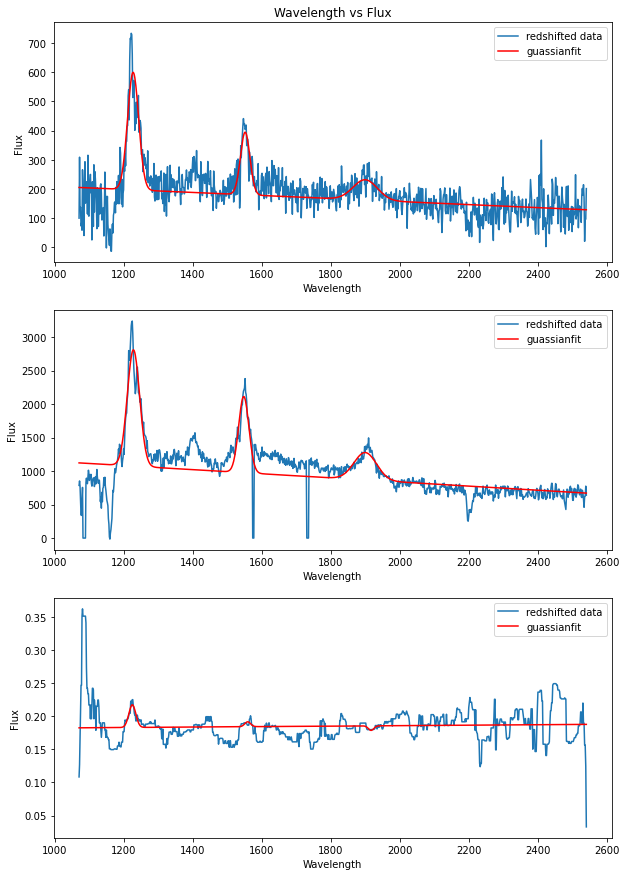

J1041+1710.npy
2.01


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

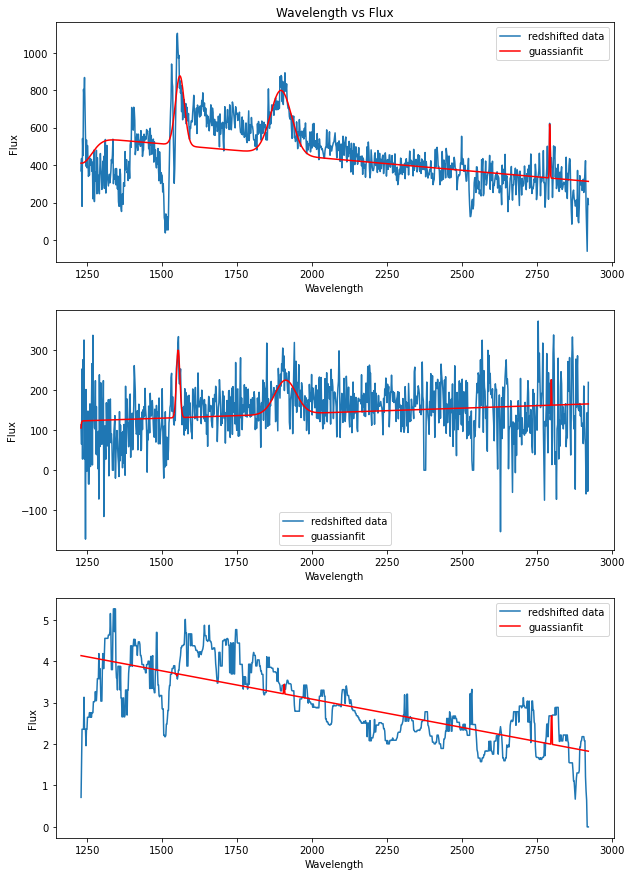

J0909-0749.npy
1.075


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

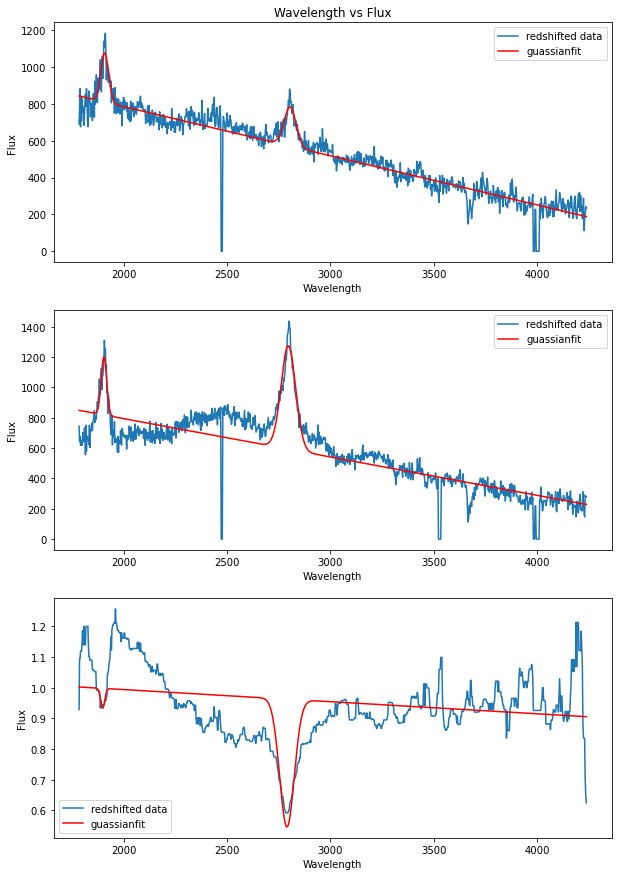

J0347-2154.npy
0.81


<Figure size 432x288 with 0 Axes>

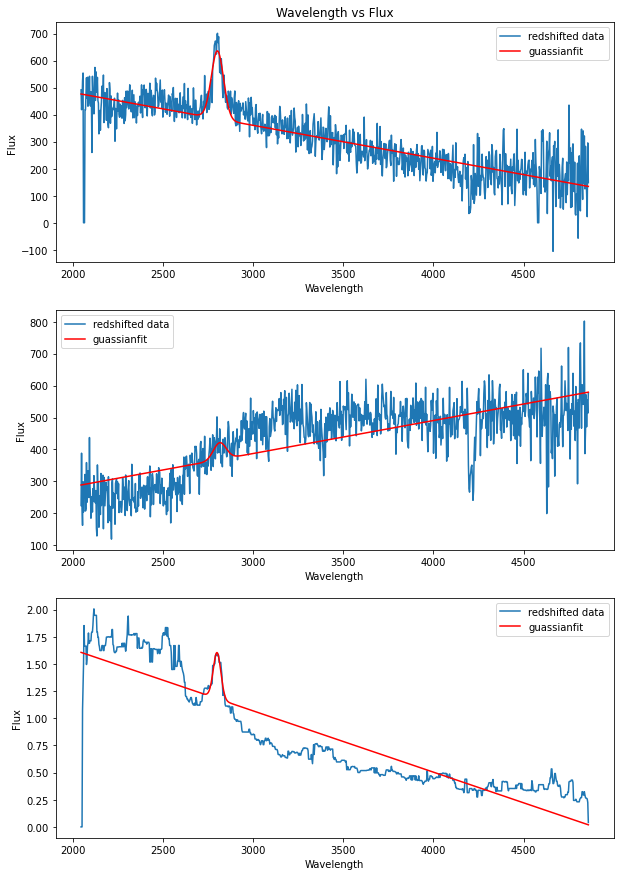

J0124-6334.npy
1.3


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

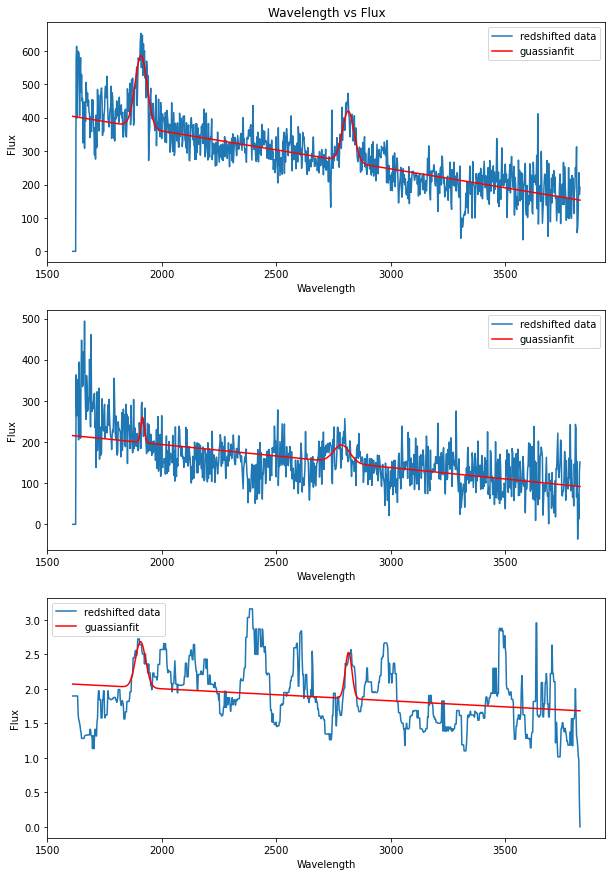

J0232-2429.npy
1.578


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

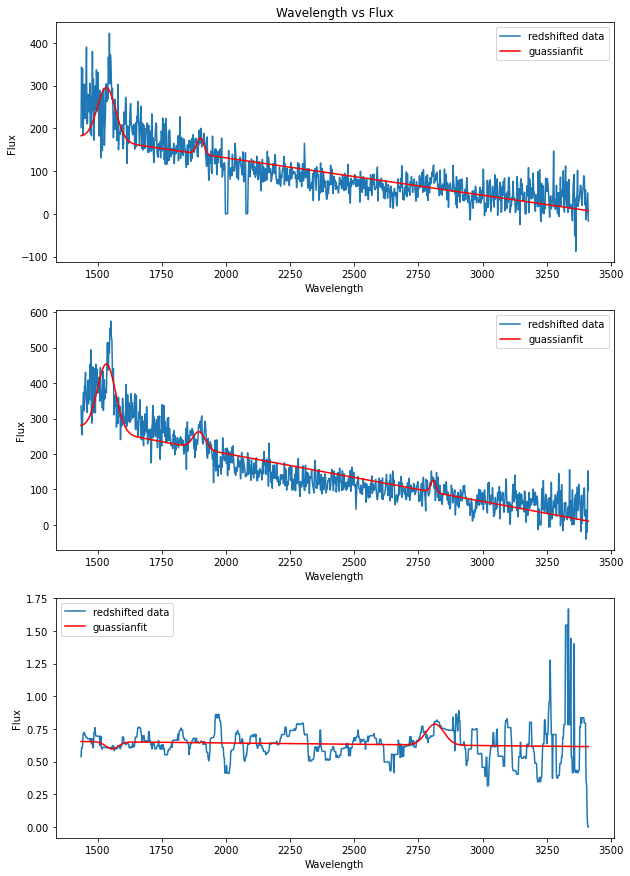

J0416-5606.npy
1.45


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

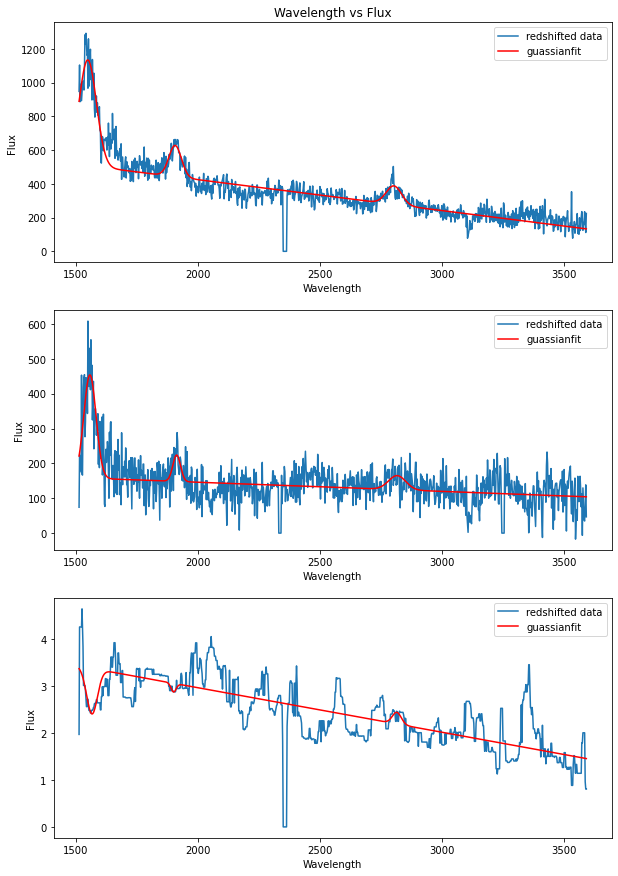

J2244-0550.npy
2.84


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

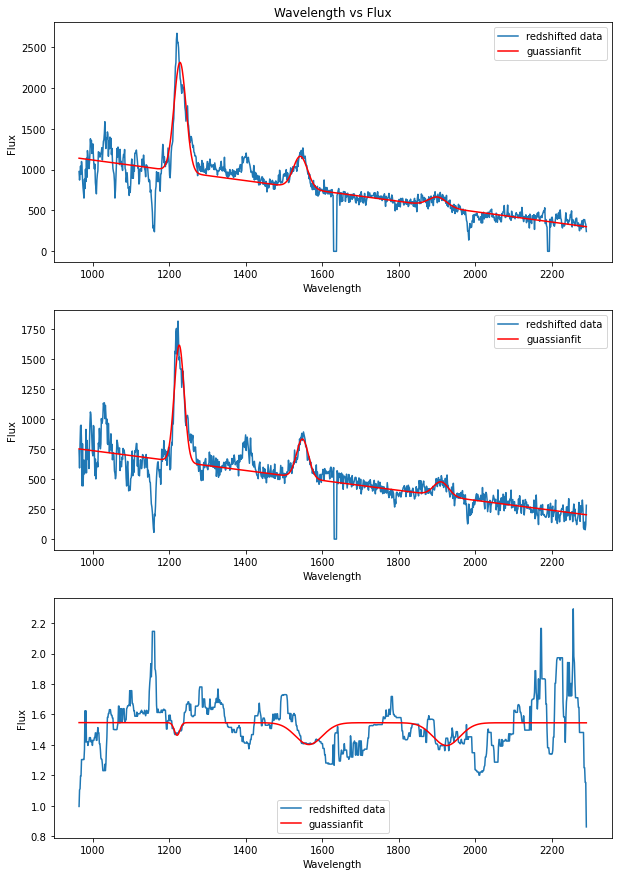

J0247-6349.npy
2.295


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

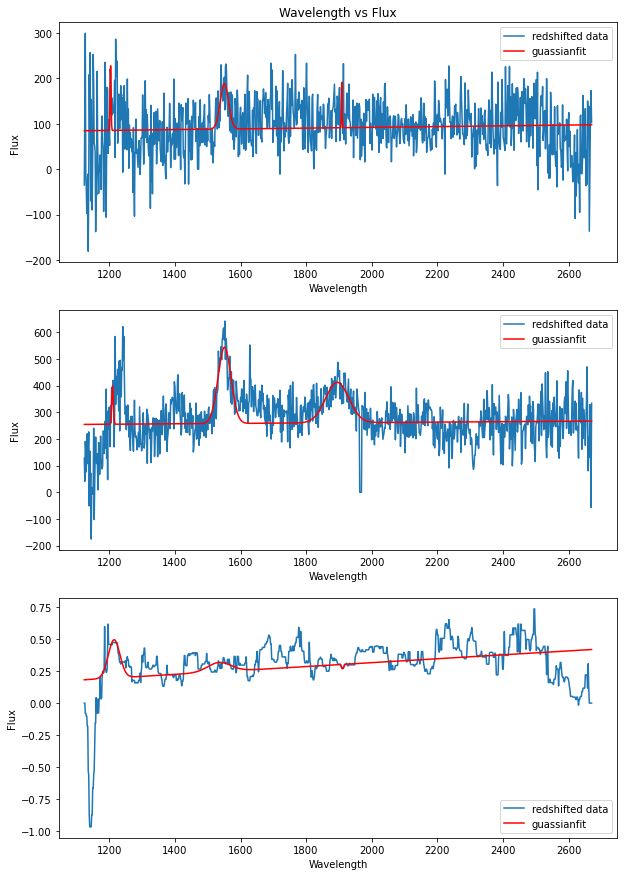

J2213-5926.npy
1.72


<Figure size 432x288 with 0 Axes>

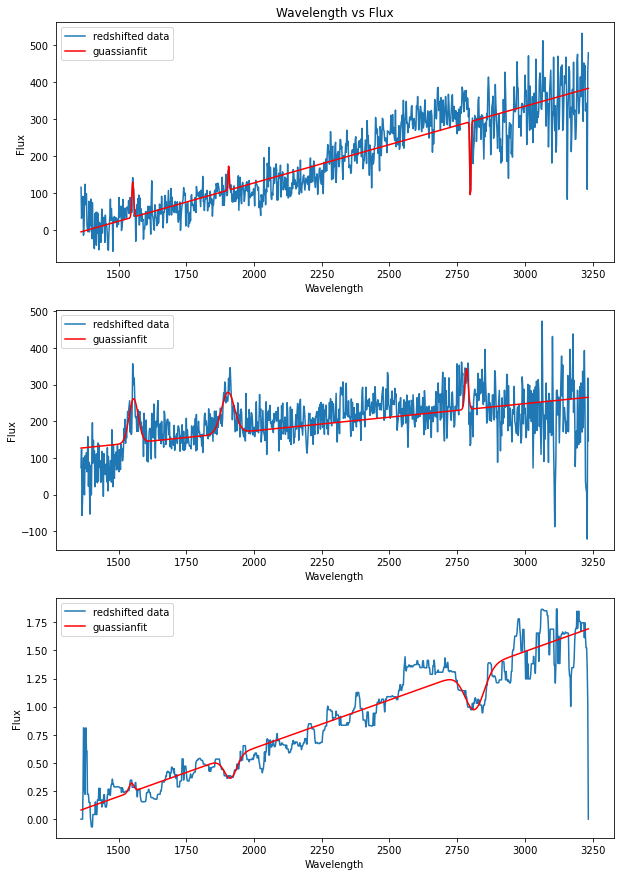

J2341-1557.npy
1.535


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

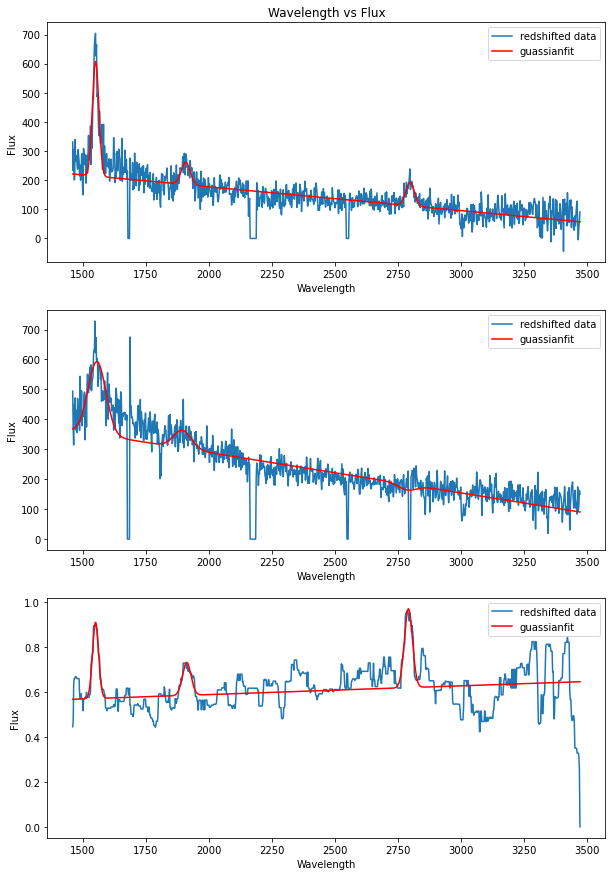

J1202+0703.npy
2.187


/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_17179/1397786178.py:73: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

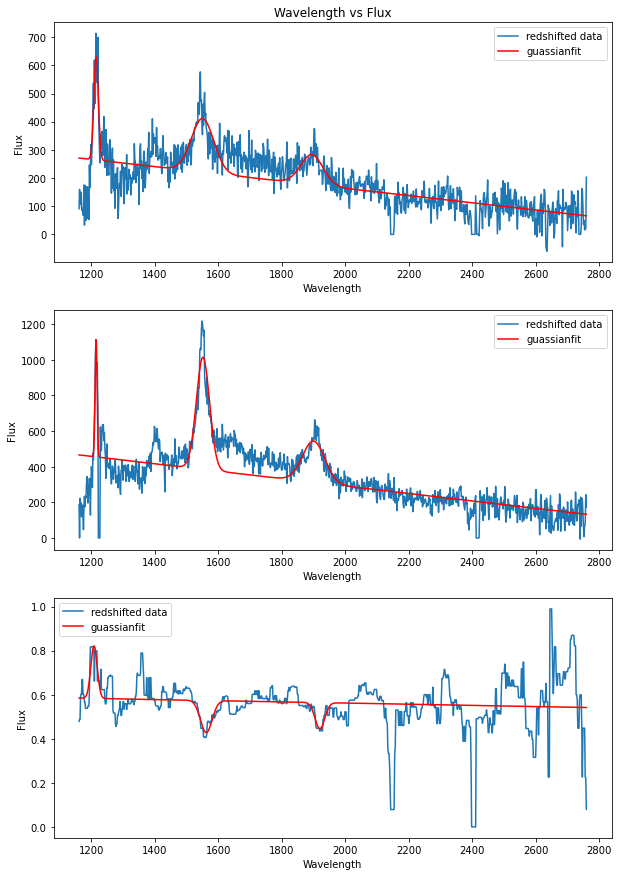

<Figure size 432x288 with 0 Axes>

In [28]:

DF=pd.read_csv('NTT.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
header=['name','LyA_high1','LyA_high1_err','LyA_low1','LyA_low1_err','FWHM_LyA1','FWHM_LyA1_err',
        'Center_LyA1','Center_LyA1_err','LyA_high2','LyA_high2_err','LyA_low2','LyA_low2_err','FWHM_LyA2',
        'FWHM_LyA2_err','Center_LyA2','Center_LyA2_err','LyA_high3','LyA_high3_err','LyA_low3','LyA_low3_err',
        'FWHM_LyA3','FWHM_LyA3_err','Center_LyA3','Center_LyA3_err',
        'CIV_high1','CIV_high1_err','CIV_low1','CIV_low1_err','FWHM_CIV1','FWHM_CIV1_err','Center_CIV1',
        'Center_CIV1_err','CIV_high2','CIV_high2_err','CIV_low2','CIV_low2_err','FWHM_CIV2','FWHM_CIV2_err',
        'Center_CIV2','Center_CIV2_err','CIV_high3','CIV_high3_err','CIV_low3','CIV_low3_err','FWHM_CIV3',
        'FWHM_CIV3_err','Center_CIV3','Center_CIV3_err','CIII_high1','CIII_high1_err','CIII_low1',
        'CIII_low1_err','FWHM_CIII1','FWHM_CIII1_err','Center_CIII1','Center_CIII1_err','CIII_high2',
        'CIII_high2_err','CIII_low2','CIII_low2_err','FWHM_CIII2','FWHM_CIII2_err','Center_CIII2',
        'Center_CIII2_err','CIII_high3','CIII_high3_err','CIII_low3','CIII_low3_err','FWHM_CIII3',
        'FWHM_CIII3_err','Center_CIII3','Center_CIII3_err','MgII_high1','MgII_high1_err','MgII_low1',
        'MgII_low1_err','FWHM_MgII1','FWHM_MgII1_err','Center_MgII1','Center_MgII1_err','MgII_high2',
        'MgII_high2_err','MgII_low2','MgII_low2_err','FWHM_MgII2','FWHM_MgII2_err','Center_MgII2',
        'Center_MgII2_err','MgII_high3','MgII_high3_err','MgII_low3','MgII_low3_err','FWHM_MgII3',
        'FWHM_MgII3_err','Center_MgII3','Center_MgII3_err','median_b','median_err_b','slope_b','slope_err_b',
        'amp_LyA_b','amp_err_LyA_b','cen_LyA_b','cen_err_LyA_b','sig_LyA_b','sig_err_LyA_b','amp_CIV_b',
        'amp_err_CIV_b','cen_CIV_b','cen_err_CIV_b','sig_CIV_b','sig_err_CIV_b','amp_CIII_b',
        'amp_err_CIII_b','cen_CIII_b','cen_err_CIII_b','sig_CIII_b','sig_err_CIII_b','amp_MgII_b',
        'amp_err_MgII_b','cen_MgII_b','cen_err_MgII_b','sig_MgII_b','sig_err_MgII_b','median_f',
        'median_err_f','slope_f','slope_err_f','amp_LyA_f','amp_err_LyA_f','cen_LyA_f','cen_err_LyA_f',
        'sig_LyA_f','sig_err_LyA_f','amp_CIV_f','amp_err_CIV_f','cen_CIV_f','cen_err_CIV_f','sig_CIV_f',
        'sig_err_CIV_f','amp_CIII_f','amp_err_CIII_f','cen_CIII_f','cen_err_CIII_f','sig_CIII_f',
        'sig_err_CIII_f','amp_MgII_f','amp_err_MgII_f','cen_MgII_f','cen_err_MgII_f','sig_MgII_f',
        'sig_err_MgII_f','median_r','median_err_r','slope_r','slope_err_r','amp_LyA_r','amp_err_LyA_r',
        'cen_LyA_r','cen_err_LyA_r','sig_LyA_r','sig_err_LyA_r','amp_CIV_r','amp_err_CIV_r','cen_CIV_r',
        'cen_err_CIV_r','sig_CIV_r','sig_err_CIV_r','amp_CIII_r','amp_err_CIII_r','cen_CIII_r',
        'cen_err_CIII_r','sig_CIII_r','sig_err_CIII_r','amp_MgII_r','amp_err_MgII_r','cen_MgII_r',
        'cen_err_MgII_r','sig_MgII_r','sig_err_MgII_r','Ratio_LyA_High','Ratio_LyA_High_err',
        'Ratio_LyA_Conti','Ratio_LyA_Conti_err','Ratio_CIV_High','Ratio_CIV_High_err','Ratio_CIV_Conti',
        'Ratio_CIV_Conti_err','Ratio_CIII_High','Ratio_CIII_High_err','Ratio_CIII_Conti',
        'Ratio_CIII_Conti_err','Ratio_MgII_High','Ratio_MgII_High_err','Ratio_MgII_Conti',
        'Ratio_MgII_Conti_err']
print(len(header))
with open('RESULTS.csv', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(header)  
    f_object.close()
    



for i in range(0,len(DF)): 
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(3,1,figsize=(10,15))  
    fig.patch.set_facecolor('white')
   #BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3700) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    y3=y1/y2
    
    y3=np.nan_to_num(y3,nan=np.nanmedian(y3))
    y3=medfilt(y3,13)
    med3=statistics.median(y3)
    ax[0].set_title('Wavelength vs Flux')
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
            ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[13]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        
        lyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        LyA_high1=(gauss4(popt1[3],*popt1)) 
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss4(popt1[6],*popt1))

        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss4(popt1[9],*popt1)) 
        
        
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2)
        MgII_high1=(gauss4(popt1[12],*popt1)) 
        
              
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2+perr1[11]**2)
        
        
        MgII_dif1=MgII_high1-MgII_low1
               
          
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
         
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        
        perr2 = np.sqrt(np.diag(pcov2))

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2=round(2*np.log(2))*perr2[10]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[13]

        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        lyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss4(popt2[3],*popt2)) 
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss4(popt2[6],*popt2))
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss4(popt2[9],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2)
        MgII_high2=(gauss4(popt2[12],*popt2))
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2+perr2[11]**2)
        
        MgII_dif2=MgII_high2-MgII_low2
              
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss4,x,y3,p0=p03,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[10]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[13])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[13]


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss4(popt3[3],*popt3))
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss4(popt3[6],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss4(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        
        CIII_dif3=CIII_high3-CIII_low3

    
        MgII_low3=(popt3[0]+popt3[1]*popt3[12])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss4(popt3[12],*popt3))    
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
            
     
        
        Ratio_LyA_high=LyA_high1/LyA_high2
        Ratio_LyA_high_err=Ratio_LyA_high*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)   
        Ratio_LyA_conti=LyA_low1/LyA_low2
        Ratio_LyA_conti_err=Ratio_LyA_conti*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        Ratio_CIV_high=CIV_high1/CIV_high2
        Ratio_CIV_high_err=Ratio_CIV_high*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        Ratio_CIV_conti=CIV_low1/CIV_low2
        Ratio_CIV_conti_err=Ratio_CIV_conti*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        Ratio_CIII_high=CIII_high1/CIII_high2
        Ratio_CIII_high_err=Ratio_CIII_high*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        Ratio_CIII_conti=CIII_low1/CIII_low2
        Ratio_CIII_conti_err=Ratio_CIII_conti*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        Ratio_MgII_high=MgII_high1/MgII_high2
        Ratio_MgII_high_err=Ratio_MgII_high*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        Ratio_MgII_conti=MgII_low1/MgII_low2
        Ratio_MgII_conti_err=Ratio_MgII_conti*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        
        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[12],perr2[12],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[12],perr2[12],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[12],perr3[12]]
        
        Ratio=[Ratio_LyA_high,Ratio_LyA_high_err,Ratio_LyA_conti,Ratio_LyA_conti_err,
               Ratio_CIV_high,Ratio_CIV_high_err,Ratio_CIV_conti,Ratio_CIV_conti_err,
               Ratio_CIII_high,Ratio_CIII_high_err,Ratio_CIII_conti,Ratio_CIII_conti_err,
               Ratio_MgII_high,Ratio_MgII_high_err,Ratio_MgII_conti,Ratio_MgII_conti_err]
        
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        error=[popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],popt1[8],perr1[8],
               popt1[9],perr1[9],popt1[10],perr1[10],popt1[11],perr1[11],popt1[12],perr1[12],
               popt1[13],perr1[13],popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],popt2[11],perr2[11],popt2[12],perr2[12],
               popt2[13],perr2[13],popt3[0],perr3[0],popt3[1],perr3[1],popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],
               popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],popt3[11],perr3[11],
               popt3[12],perr3[12],popt3[13],perr3[13]]
        

#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
#         print(RESULTS)
        RESULTS=[*value,*error,*Ratio]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss4(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
               
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[10]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[3],*popt1))
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        
        CIV_dif1=CIV_high1-CIV_low1

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[6],*popt1))  
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1

    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        MgII_dif1=MgII_high1-MgII_low1
        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                                 bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[10]


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        MgII_high2=(gauss3(popt2[9],*popt2)) 
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        MgII_dif2=MgII_high2-MgII_low2

     
     
        p03=[med3,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[3],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[6],*popt3))    
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
    
        MgII_low3=(popt3[0]+popt3[1]*popt3[9])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)                                 
        MgII_high3=(gauss3(popt3[9],*popt3))   
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
         
     
       
        Ratio_LyA_high=0
        Ratio_LyA_high_err=0   
        Ratio_LyA_conti=0
        Ratio_LyA_conti_err=0
        Ratio_CIV_high=CIV_high1/CIV_high2
        Ratio_CIV_high_err=Ratio_CIV_high*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        Ratio_CIV_conti=CIV_low1/CIV_low2
        Ratio_CIV_conti_err=Ratio_CIV_conti*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        Ratio_CIII_high=CIII_high1/CIII_high2
        Ratio_CIII_high_err=Ratio_CIII_high*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        Ratio_CIII_conti=CIII_low1/CIII_low2
        Ratio_CIII_conti_err=Ratio_CIII_conti*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        Ratio_MgII_high=MgII_high1/MgII_high2
        Ratio_MgII_high_err=Ratio_MgII_high*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        Ratio_MgII_conti=MgII_low1/MgII_low2
        Ratio_MgII_conti_err=Ratio_MgII_conti*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[9],perr2[9],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[9],perr2[9],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[9],perr3[9]]
        Ratio=[0,0,0,0,
               Ratio_CIV_high,Ratio_CIV_high_err,Ratio_CIV_conti,Ratio_CIV_conti_err,
               Ratio_CIII_high,Ratio_CIII_high_err,Ratio_CIII_conti,Ratio_CIII_conti_err,
               Ratio_MgII_high,Ratio_MgII_high_err,Ratio_MgII_conti,Ratio_MgII_conti_err]
        
        
        
        
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],
               popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],popt2[9],perr2[9],popt2[10],perr2[10],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],popt3[3],perr3[3],
               popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],
               popt3[9],perr3[9],popt3[10],perr3[10]]
        
        
#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
#       print(RESULTS)
        RESULTS=[*value,*error,*Ratio]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
        
    
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1



        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[6],*popt1)) 
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        CIII_dif1=CIII_high1-CIII_low1



        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[10]


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss3(popt2[3],*popt2))  
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[6],*popt2))   
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        CIII_dif2=CIII_high2-CIII_low2
        
        
        
        
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

        perr3 = np.sqrt(np.diag(pcov3))
            
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII_err=round(2*np.log(2))*perr3[10]
        


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss3(popt3[3],*popt3))    
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3


        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[6],*popt3))  
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
        
        Ratio_LyA_high=LyA_high1/LyA_high2
        Ratio_LyA_high_err=Ratio_LyA_high*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)   
        Ratio_LyA_conti=LyA_low1/LyA_low2
        Ratio_LyA_conti_err=Ratio_LyA_conti*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        Ratio_CIV_high=CIV_high1/CIV_high2
        Ratio_CIV_high_err=Ratio_CIV_high*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        Ratio_CIV_conti=CIV_low1/CIV_low2
        Ratio_CIV_conti_err=Ratio_CIV_conti*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        Ratio_CIII_high=CIII_high1/CIII_high2
        Ratio_CIII_high_err=Ratio_CIII_high*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        Ratio_CIII_conti=CIII_low1/CIII_low2
        Ratio_CIII_conti_err=Ratio_CIII_conti*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        Ratio_MgII_high=0
        Ratio_MgII_high_err=0
        Ratio_MgII_conti=0
        Ratio_MgII_conti_err=0
        

        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#         print(value)
        Ratio=[Ratio_LyA_high,Ratio_LyA_high_err,Ratio_LyA_conti,Ratio_LyA_conti_err,
               Ratio_CIV_high,Ratio_CIV_high_err,Ratio_CIV_conti,Ratio_CIV_conti_err,
               Ratio_CIII_high,Ratio_CIII_high_err,Ratio_CIII_conti,Ratio_CIII_conti_err,
               0,0,0,0]
    
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],0,0,0,0,0,0,
               popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],
               0,0,0,0,0,0]
        
#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
#         print(RESULTS) 
        RESULTS=[*value,*error,*Ratio]

        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        


        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
        
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[4]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[7]


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIII_dif1=CIII_high1-CIII_low1


        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        MgII_high1=(gauss2(popt1[6],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        MgII_dif1=MgII_high1-MgII_low1
        

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr2 = np.sqrt(np.diag(pcov2))
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[4]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[7]

        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[3],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)

        MgII_dif2=MgII_high2-MgII_low2
                
        
        p03=[med3,0,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[7]


        CIII_low3=(popt3[0]+popt3[1]*popt3[3])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[3],*popt3))
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3

        MgII_low3=(popt3[0]+popt3[1]*popt3[6])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss2(popt3[6],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
        
        Ratio_LyA_high=0
        Ratio_LyA_high_err=0   
        Ratio_LyA_conti=0
        Ratio_LyA_conti_err=0
        Ratio_CIV_high=0
        Ratio_CIV_high_err=0
        Ratio_CIV_conti=0
        Ratio_CIV_conti_err=0
        Ratio_CIII_high=CIII_high1/CIII_high2
        Ratio_CIII_high_err=Ratio_CIII_high*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        Ratio_CIII_conti=CIII_low1/CIII_low2
        Ratio_CIII_conti_err=Ratio_CIII_conti*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        Ratio_MgII_high=MgII_high1/MgII_high2
        Ratio_MgII_high_err=Ratio_MgII_high*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        Ratio_MgII_conti=MgII_low1/MgII_low2
        Ratio_MgII_conti_err=Ratio_MgII_conti*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
       
  
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[3],perr1[3],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[3],perr2[3],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[3],perr3[3],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[6],perr2[6],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[6],perr2[6],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[6],perr3[6]]
        Ratio=[0,0,0,0,
               0,0,0,0,
               Ratio_CIII_high,Ratio_CIII_high_err,Ratio_CIII_conti,Ratio_CIII_conti_err,
               Ratio_MgII_high,Ratio_MgII_high_err,Ratio_MgII_conti,Ratio_MgII_conti_err]
        
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],
               popt1[6],perr1[6],popt1[7],perr1[7],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[7],perr3[7]]     
#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
#         print(RESULTS)
        RESULTS=[*value,*error,*Ratio]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
        
        
                       
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss2(popt1[3],*popt1))  
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIV_dif1=CIV_high1-CIV_low1


        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1  

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2))
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]

        
        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss2(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2


        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2
              
        
        p03=[med3,0,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,1925,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[7]


        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss2(popt3[3],*popt3))    
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3


        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[6],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
        
        Ratio_LyA_high=0
        Ratio_LyA_high_err=0 
        Ratio_LyA_conti=0
        Ratio_LyA_conti_err=0
        Ratio_CIV_high=CIV_high1/CIV_high2
        Ratio_CIV_high_err=Ratio_CIV_high*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        Ratio_CIV_conti=CIV_low1/CIV_low2
        Ratio_CIV_conti_err=Ratio_CIV_conti*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        Ratio_CIII_high=CIII_high1/CIII_high2
        Ratio_CIII_high_err=Ratio_CIII_high*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        Ratio_CIII_conti=CIII_low1/CIII_low2
        Ratio_CIII_conti_err=Ratio_CIII_conti*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        Ratio_MgII_high=0
        Ratio_MgII_high_err=0
        Ratio_MgII_conti=0
        Ratio_MgII_conti_err=0
        

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        Ratio=[0,0,0,0,
               Ratio_CIV_high_err,Ratio_CIV_high_err,Ratio_CIV_conti,Ratio_CIV_conti_err,
               Ratio_CIII_high,Ratio_CIII_high_err,Ratio_CIII_conti,Ratio_CIII_conti_err,
               0,0,0,0]
       
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[popt1[0],perr1[0],popt1[0],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],
               popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               0,0,0,0,0,0,popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,popt2[2],perr2[2],
               popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],
               popt3[7],perr3[7],0,0,0,0,0,0]
                
#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
#         print(RESULTS)
        RESULTS=[*value,*error,*Ratio]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
        
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[4]

        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        MgII_high1=(gauss1(popt1[3],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        MgII_dif1=MgII_high1-MgII_low1

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr2 = np.sqrt(np.diag(pcov2))    
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII2_err=perr2[4]

        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        MgII_high2=(gauss1(popt2[3],*popt2))   
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        MgII_dif2=MgII_high2-MgII_low2
               
        p03=[med3,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss1,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))   
          
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
       
        MgII_low3=(popt3[0]+popt3[1]*popt3[3])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss1(popt3[3],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3 
        
        Ratio_MgII_high=MgII_high1/MgII_high2
        Ratio_MgII_high_err=Ratio_MgII_high*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        Ratio_MgII_conti=MgII_low1/MgII_low2
        Ratio_MgII_conti_err=Ratio_MgII_conti*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[3],perr2[3],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[3],perr2[3],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[3],perr3[3]]
        Ratio=[0,0,0,0,0,0,0,0,0,0,0,0,
               Ratio_MgII_high,Ratio_MgII_high_err,Ratio_MgII_conti,Ratio_MgII_conti_err]
        
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],
               popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4]]
#         RESULTS=np.concatenate((value,error,Ratio),axis=None)
        RESULTS=[*value,*error,*Ratio]

        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
       
        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss1(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        with open('RESULTS.csv', 'a', newline='',) as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow(RESULTS)  
            f_object.close()
   
        
    
#     with open('RESULTSSS.csv', 'a', newline='',) as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(RESULTS)  
#         f_object.close()
#     path1='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/plots/three spectra/'
#     #plt.savefig(path1+name[i]+'.png')
    plt.show()
    plt.clf()

J0045-3937


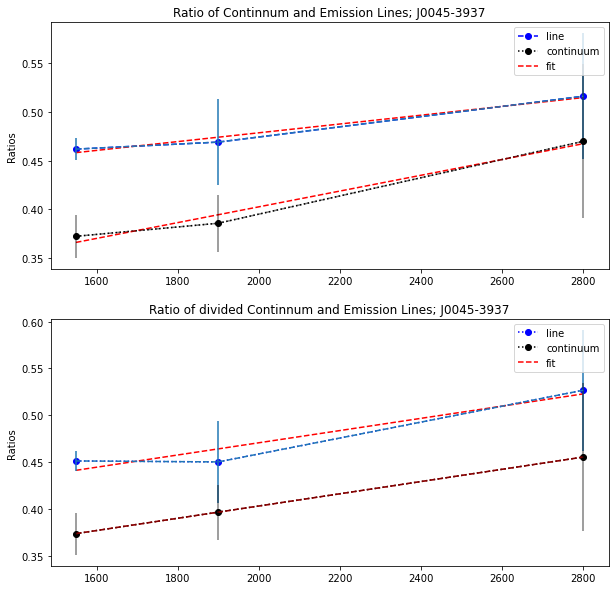

J0247-0800


<Figure size 432x288 with 0 Axes>

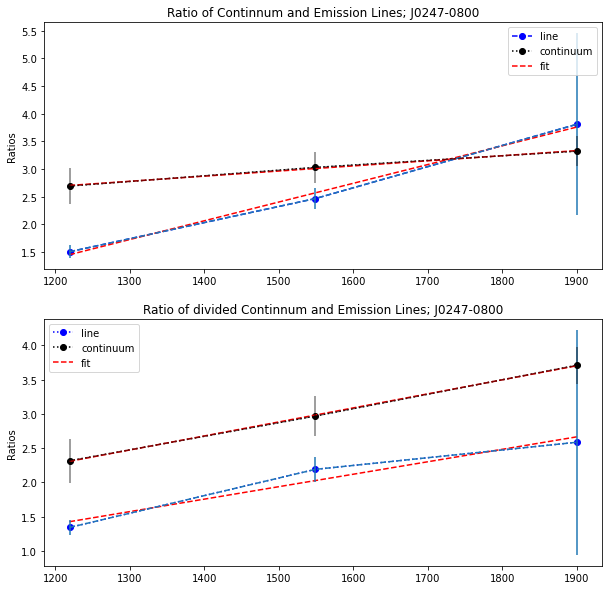

J0628-7448


<Figure size 432x288 with 0 Axes>

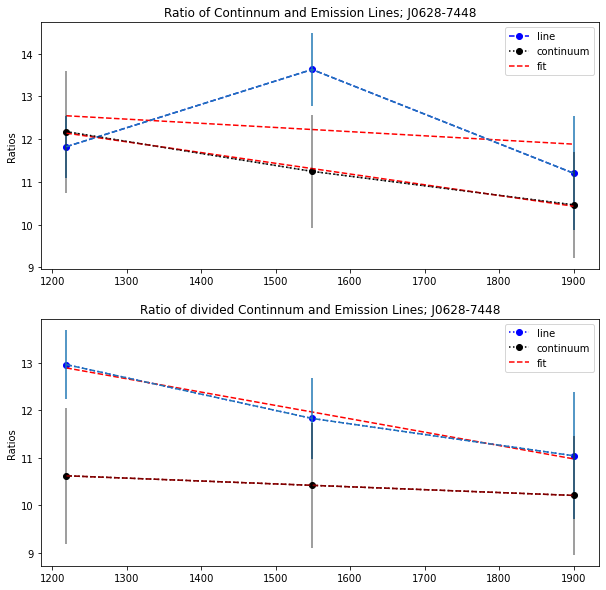

J0936-1211


<Figure size 432x288 with 0 Axes>

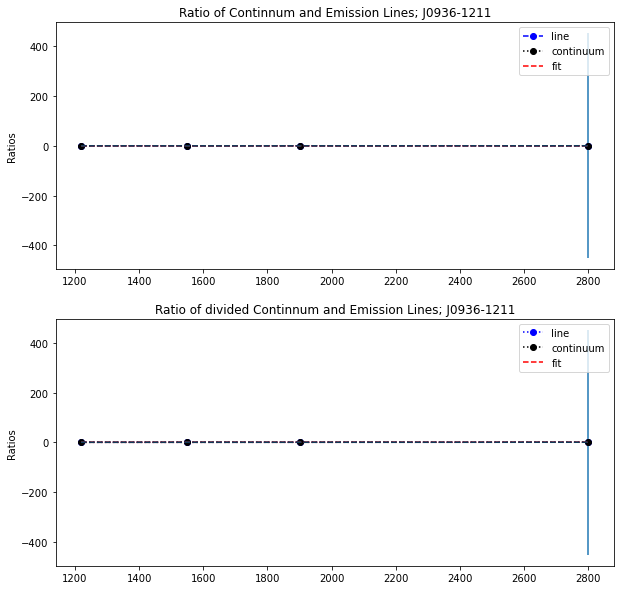

J1247-3253


<Figure size 432x288 with 0 Axes>

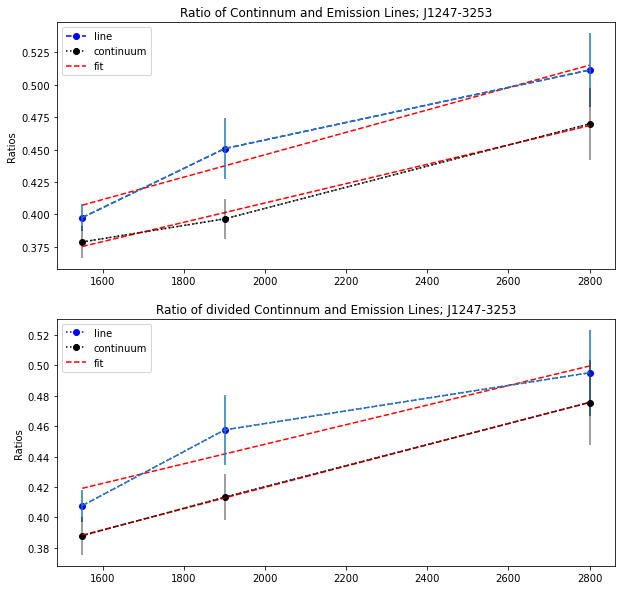

J0125-1012


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<Figure size 432x288 with 0 Axes>

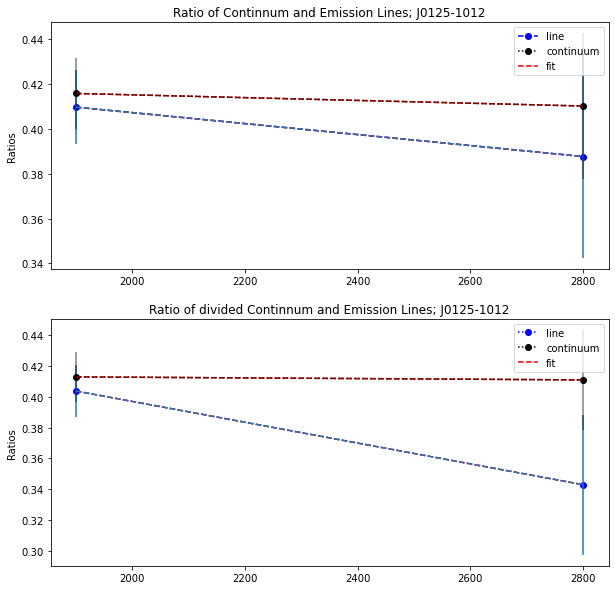

J0332-6608


<Figure size 432x288 with 0 Axes>

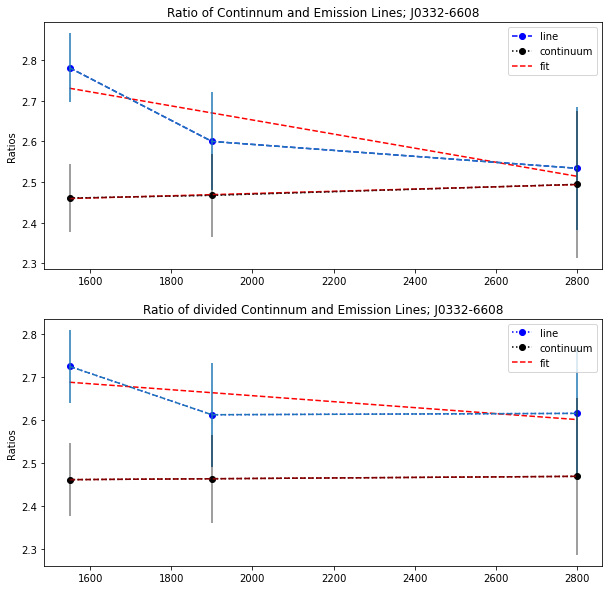

J0527-2431


<Figure size 432x288 with 0 Axes>

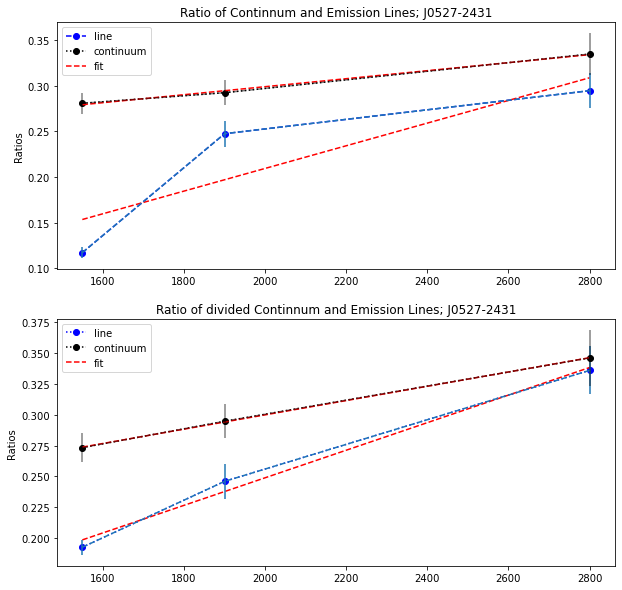

J0833-0721


TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

<Figure size 432x288 with 0 Axes>

In [33]:
for i in range(len(df)):
    x=['1219','1549','1900','2800']
    x = np.asarray(x, dtype='float64')
    print(df.name[i])
    a1=df.Ratio_LyA_High[i]
    a1_err=df.Ratio_LyA_High_err[i]
    a1=float(a1)
    a1_err=float(a1_err)
    a1=np.round(a1,4)
    
    
    b1=df.Ratio_CIV_High[i]    
    b1=float(b1)
    b1=np.round(b1,4)
    b1_err=df.Ratio_CIV_High_err[i]    
    b1_err=float(b1_err)
    
    
    c1=df.Ratio_CIII_High[i]
    c1=float(c1)
    c1=np.round(c1,4)
    c1_err=df.Ratio_CIII_High_err[i]
    c1_err=float(c1_err)
    
    d1=df.Ratio_MgII_High[i]
    d1=float(d1)
    d1=np.round(d1,4)
    d1_err=df.Ratio_MgII_High_err[i]
    d1_err=float(d1_err)
    
    y1 = [a1,b1,c1,d1]
    y1_err=[a1_err,b1_err,c1_err,d1_err]
    
    a2=df.Ratio_LyA_Conti[i]
    a2=float(a2)
    a2=np.round(a2,4)
    a2_err=df.Ratio_LyA_Conti_err[i]
    a2_err=float(a2_err)
    
    b2=df.Ratio_CIV_Conti[i]
    b2=float(b2)
    b2=np.round(b2,4)
    b2_err=df.Ratio_CIV_Conti_err[i]
    b2_err=float(b2_err)
    
    c2=df.Ratio_CIII_Conti[i]
    c2=float(c2)
    c2=np.round(c2,4)
    c2_err=df.Ratio_CIII_Conti_err[i]
    c2_err=float(c2_err)
    
    d2=df.Ratio_MgII_Conti[i]
    d2=float(d2)
    d2=np.round(d2,4)
    d2_err=df.Ratio_MgII_Conti_err[i]
    d2_err=float(d2_err)
    
    
    
    y2 = [a2,b2,c2,d2]
    y2_err=[a2_err,b2_err,c2_err,d2_err]
    
    y1 = np.asarray(y1)
    y1_err= np.asarray(y1_err)
    y2 = np.asarray(y2)
    y2_err = np.asarray(y2_err)
    x = np.asarray(x)
    mask1 = np.where(y1 != 0)[0]
    mask2 = np.where(y2 != 0)[0]
    y1 = y1[mask1]
    y1_err= y1_err[mask1]
    y2 = y2[mask2]
    y2_err = y2_err[mask2]
    
    x = x[mask1]
    
    
    med1=statistics.median(y1)
    p01=[0,med1]
    popt1,pcov1=curve_fit(line,x,y1,p0=p01)
    
    med2=statistics.median(y2)
    p02=[0,med2]
    popt2,pcov2=curve_fit(line,x,y2,p0=p02)
    
    fig,ax = plt.subplots(2,1,figsize=[10,10])
    fig.patch.set_facecolor('white')
   
    ax[0].plot(x,y1,'bo',ls='--',label='line')
    ax[0].plot(x, line(x, *popt1),'r', ls='--')
    ax[0].errorbar(x,y1,y1_err,ls='--')

    ax[0].plot(x,y2,color='black', ls='dotted', marker='o', markerfacecolor='k',label='continuum')
    ax[0].plot(x, line(x, *popt2),'r', ls='--',label='fit')
    ax[0].errorbar(x,y2,y2_err,ls='--',color='k',alpha=0.5)
    ax[0].legend()
    
  
    #plt.ylim(-5,5)
    ax[0].set_title('Ratio of Continnum and Emission Lines; '+df.name[i])
    ax[0].set_ylabel('Ratios')
    
    a3=df.LyA_high3[i]
    a3_err=df.LyA_high3_err[i]
    
    b3=df.CIV_high3[i]
    b3_err=df.CIV_high3_err[i]
    
    c3=df.CIII_high3[i]
    c3_err=df.CIII_high3_err[i]
    
    d3=df.MgII_high3[i]
    d3_err=df.MgII_high3_err[i]
    
    y3=[a3,b3,c3,d3]
    y3_err=[a3_err,b3_err,c3_err,d3_err]
    
    a4=df.LyA_low3[i]
    a4_err=df.LyA_low3_err[i]
    
    b4=df.CIV_low3[i]
    b4_err=df.CIV_low3_err[i]
    
    c4=df.CIII_low3[i]
    c4_err=df.CIII_low3_err[i]
    
    d4=df.MgII_low3[i]
    d4_err=df.MgII_low3_err[i]
    
    y4=[a4,b4,c4,d4]
    y4_err=[a4_err,b4_err,c4_err,d4_err]
    
    y3 = np.asarray(y3)
    y3_err= np.asarray(y3_err)
    y4 = np.asarray(y4)
    y4_err = np.asarray(y4_err)
    
    y3 = y3[mask1]
    y3_err= y3_err[mask1]
    y4 = y4[mask2]
    y4_err = y4_err[mask2]
    
    med3=statistics.median(y3)
    p03=[0,med3]
    popt3,pcov3=curve_fit(line,x,y3,p0=p03)
    
    med4=statistics.median(y4)
    p04=[0,med4]
    popt4,pcov4=curve_fit(line,x,y4,p0=p04)
    
    
    
    ax[1].plot(x,y3,'bo',ls='dotted',label='line')
    ax[1].plot(x, line(x, *popt3),'r',ls='--')
    ax[1].errorbar(x,y3,y3_err,ls='--')

    ax[1].plot(x,y4,color='black', ls='dotted', marker='o', markerfacecolor='k',label='continuum')
    ax[1].plot(x, line(x, *popt4),'r', ls='--',label='fit')
    ax[1].errorbar(x,y4,y4_err,ls='--',color='k',alpha=0.5)
    ax[1].legend()
    
  
    #plt.ylim(-5,5)
    ax[1].set_title('Ratio of divided Continnum and Emission Lines; '+df.name[i])
    ax[1].set_ylabel('Ratios')
    
    perr1 = np.sqrt(np.diag(pcov1))
    perr2 = np.sqrt(np.diag(pcov2))
    perr3 = np.sqrt(np.diag(pcov3))
    perr4 = np.sqrt(np.diag(pcov4))
    
    line_intercept=popt1[1] 
    line_intercept_err=perr1[1] 
    line_slope=popt1[0]
    line_slope_err=perr1[0]
    continuum_intercept=popt2[1]
    continuum_intercept_err=perr2[1]
    continuum_slope=popt2[0]
    continuum_slope_err=perr2[0]
    
    ratio_line_intercept=popt3[1]
    ratio_line_intercept_err=perr3[1]
    ratio_line_slope=popt3[0]
    ratio_line_slope_err=perr3[0]
    ratio_continuum_intercept=popt4[1]
    ratio_continuum_intercept_err=perr4[1]
    ratio_continuum_slope=popt4[0]
    ratio_continuum_slope_err=perr4[0]
    
    results=[df.name[i],line_intercept,line_intercept_err,line_slope,line_slope_err,
             continuum_intercept,continuum_intercept_err,continuum_slope,continuum_slope_err,
            ratio_line_intercept,ratio_line_intercept_err,ratio_line_slope,ratio_line_slope_err,
            ratio_continuum_intercept,ratio_continuum_intercept_err,ratio_continuum_slope,ratio_continuum_slope_err]
#     with open('ratio_params_ciii.csv','a') as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(results)  
#         f_object.close()
        
#     plt.savefig('/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/ratio plots/fitted ratio plots/WHT/'+df.name[i])
    plt.show()
    plt.clf()